### This notebook will be used for the Assignment of week 5 of capstone course for Applied Data Science on Coursera


### Author: Rajiv Ranjan Singh

1. [Part 1: Import Libraries](#part1)

2. [Part 2: Fetching and cleaning crime data of Toronto](#part2)

3. [Part 3: Fetching and cleaning crime data of New York¶](#part3)

4. [Part 4: Get Lat, Long for Toronto Neighbourhoods¶](#part4)

5. [Part 5: Get Lat, Long for New York precincts](#part5)

6. [Part 6: Plot Toronto neighbourhoods on Map](#part6)

7. [Part 7: Plot New York neighbourhoods on map](#part7)

8. [Part 8: Explore Datasets of Toronto and retrieve and append category wise venues for neighbourhoods](#part8)

9. [Part 9: Retreive and append Venues data for New York neighbourhoods](#part9)

10. [Part 10: Cluster Neighborhoods for New York and Toronto seperately](#part10)

11. [Part 11: Compare and cluster similar neighbourhoods between New York and Toronto](#part11)

12. [Part 12 : Compare various clustering algorithms on the combined data](#part12)

13. [Part 13 : Use Inductive Clustering on New York data first followed by cluster prediction for Toronto using RandomForestClassifier](#part13)

<a id='part1'></a>

## Part 1: Import Libraries

In [102]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopy.geocoders # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

#import Scalers, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='part2'></a>

## Part 2: Fetching and cleaning crime data of Toronto

#### Create URL for fetching crime records from Toronto police data portal

In [2]:
url_crime = "https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Neighbourhood_MCI/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=false&outSR=4326&f=json"
crime_toronto_json = requests.get(url_crime).json()

#### convert to pandas Dataframe and flatten json

In [3]:
crime_toronto_df = json_normalize(crime_toronto_json["features"])
crime_toronto_df.head()

attributes.OBJECTID attributes.Neighbourhood_Crime_Rates_Neigh  \
0                    1                             Yonge-St.Clair   
1                    2                    York University Heights   
2                    3                           Lansing-Westgate   
3                    4                         Yorkdale-Glen Park   
4                    5                        Stonegate-Queensway   

  attributes.Neighbourhood_Crime_Rates_Hood_  attributes.Hood_ID  \
0                                        097                  97   
1                                        027                  27   
2                                        038                  38   
3                                        031                  31   
4                                        016                  16   

  attributes.Neighbourhood  attributes.Assault_2014  attributes.Assault_2015  \
0           Yonge-St.Clair                       58                       38   
1  York University Heights                       78                      101   
2         Lansing-Westgate                      216                      203   
3       Yorkdale-Glen Park                      121                      141   
4      Stonegate-Queensway                      109                      140   

   attributes.Assault_2016  attributes.Assault_2017  attributes.Assault_2018  \
0                       51                       46                       61   
1                      111                      120                      138   
2                      223                      226                      197   
3                      136                      124                      127   
4                      124                      112                      128   

   attributes.Assault_AVG attributes.Assault_CHG  \
0                    50.8                    33%   
1                   109.6                    15%   
2                   213.0                   -13%   
3                   129.8                     2%   
4                   122.6                    14%   

   attributes.Assault_Rate_2018  attributes.Auto_Theft_2014  \
0                        1912.8                          28   
1                         375.4                          16   
2                        1923.5                          21   
3                         696.5                          47   
4                         576.4                          20   

   attributes.Auto_Theft_2015  attributes.Auto_Theft_2016  \
0                          32                          22   
1                          13                           8   
2                          25                          23   
3                          27                          25   
4                          17                          22   

   attributes.Auto_Theft_2017  attributes.Auto_Theft_2018  \
0                          46                          69   
1                          19                          23   
2                          36                          22   
3                          30                          28   
4                          14                          41   

   attributes.AutoTheft_AVG attributes.AutoTheft_CHG  \
0                      39.4                      50%   
1                      15.8                      21%   
2                      25.4                     -39%   
3                      31.4                      -7%   
4                      22.8                     193%   

   attributes.AutoTheft_Rate_2018  attributes.BreakandEnter_2014  \
0                          2163.7                             29   
1                            62.6                             43   
2                           214.8                             43   
3                           153.6                             83   
4                           184.6                             48   

   attributes.BreakandEnter_2015  attributes.

In [4]:
# clean columns names
crime_toronto_df.columns = [col.split(".")[-1] for col in crime_toronto_df.columns]

In [5]:
crime_toronto_df.head()

OBJECTID Neighbourhood_Crime_Rates_Neigh Neighbourhood_Crime_Rates_Hood_  \
0         1                  Yonge-St.Clair                             097   
1         2         York University Heights                             027   
2         3                Lansing-Westgate                             038   
3         4              Yorkdale-Glen Park                             031   
4         5             Stonegate-Queensway                             016   

   Hood_ID            Neighbourhood  Assault_2014  Assault_2015  Assault_2016  \
0       97           Yonge-St.Clair            58            38            51   
1       27  York University Heights            78           101           111   
2       38         Lansing-Westgate           216           203           223   
3       31       Yorkdale-Glen Park           121           141           136   
4       16      Stonegate-Queensway           109           140           124   

   Assault_2017  Assault_2018  Assault_AVG Assault_CHG  Assault_Rate_2018  \
0            46            61         50.8         33%             1912.8   
1           120           138        109.6         15%              375.4   
2           226           197        213.0        -13%             1923.5   
3           124           127        129.8          2%              696.5   
4           112           128        122.6         14%              576.4   

   Auto_Theft_2014  Auto_Theft_2015  Auto_Theft_2016  Auto_Theft_2017  \
0               28               32               22               46   
1               16               13                8               19   
2               21               25               23               36   
3               47               27               25               30   
4               20               17               22               14   

   Auto_Theft_2018  AutoTheft_AVG AutoTheft_CHG  AutoTheft_Rate_2018  \
0               69           39.4           50%               2163.7   
1               23           15.8           21%                 62.6   
2               22           25.4          -39%                214.8   
3               28           31.4           -7%                153.6   
4               41           22.8          193%                184.6   

   BreakandEnter_2014  BreakandEnter_2015  BreakandEnter_2016  \
0                  29                  16                  28   
1                  43                  59                  61   
2                  43                  78                  72   
3                  83                  50                  65   
4                  48                  37                  34   

   BreakandEnter_2017  BreakandEnter_2018  BreakandEnter_AVG  \
0                  32                  23               25.6   
1                  34                  52               49.8   
2                  73                  52               63.6   
3                  31                  56               57.0   
4                  37                  41               39.4   

  BreakandEnter_CHG  BreakandEnter_Rate_2018  Robbery_2014  Robbery_2015  \
0              -28%                    721.2            12          25.0   
1               53%                    141.4            28          22.0   
2              -29%                    507.7            81          53.0   
3               81%                    307.1            42          32.0   
4               11%                    184.6            33          22.0   

   Robbery_2016  Robbery_2017  Robbery_2018  Robbery_AVG Robbery_CHG  \
0            14            21            19         18.2        -10%   
1            23            31            15         23.8        -52%   
2            49            43            41         53.4         -5%   
3            22            18            35         29.8         94%   
4            41            35            36         33.4          3%   

   Robbery_Rate_2018  Theft_Over_2014  T

In [6]:
# filter columns
filtered_columns_crime_toronto = ['Neighbourhood', 'Assault_AVG', 'AutoTheft_AVG','BreakandEnter_AVG','Robbery_AVG',
                                  'TheftOver_AVG','Homicide_AVG','Shape__Area']
crime_toronto_df = crime_toronto_df.loc[:, filtered_columns_crime_toronto]

print(crime_toronto_df.head())
print(crime_toronto_df.shape)

             Neighbourhood  Assault_AVG  AutoTheft_AVG  BreakandEnter_AVG  \
0           Yonge-St.Clair         50.8           39.4               25.6   
1  York University Heights        109.6           15.8               49.8   
2         Lansing-Westgate        213.0           25.4               63.6   
3       Yorkdale-Glen Park        129.8           31.4               57.0   
4      Stonegate-Queensway        122.6           22.8               39.4   

   Robbery_AVG  TheftOver_AVG Homicide_AVG   Shape__Area  
0         18.2            4.4          N/A  1.161315e+06  
1         23.8            3.8          1.3  1.324666e+07  
2         53.4            5.4          N/A  5.346186e+06  
3         29.8            9.0          1.2  6.038326e+06  
4         33.4            5.2            1  7.946202e+06  
(140, 8)


#### Homicide AVG as N/A can be replaced with 0 based on analysis.

In [7]:
crime_toronto_df[crime_toronto_df == 'N/A'].count()

/home/sp-pasighat/.local/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Neighbourhood         0
Assault_AVG           0
AutoTheft_AVG         0
BreakandEnter_AVG     0
Robbery_AVG           0
TheftOver_AVG         0
Homicide_AVG         35
Shape__Area           0
dtype: int64

In [570]:
crime_toronto_df.replace(value=0,to_replace={'Homicide_AVG':'N/A'},inplace=True)
crime_toronto_df['Homicide_AVG'] = crime_toronto_df['Homicide_AVG'].astype('float64')

In [9]:
crime_toronto_df.head()

Neighbourhood  Assault_AVG  AutoTheft_AVG  BreakandEnter_AVG  \
0           Yonge-St.Clair         50.8           39.4               25.6   
1  York University Heights        109.6           15.8               49.8   
2         Lansing-Westgate        213.0           25.4               63.6   
3       Yorkdale-Glen Park        129.8           31.4               57.0   
4      Stonegate-Queensway        122.6           22.8               39.4   

   Robbery_AVG  TheftOver_AVG Homicide_AVG   Shape__Area  
0         18.2            4.4            0  1.161315e+06  
1         23.8            3.8          1.3  1.324666e+07  
2         53.4            5.4            0  5.346186e+06  
3         29.8            9.0          1.2  6.038326e+06  
4         33.4            5.2            1  7.946202e+06

In [10]:
print( "The cleaned dataframe has ",crime_toronto_df.shape[0], "rows and ", crime_toronto_df.shape[1], " columns.") 

The cleaned dataframe has  140 rows and  8  columns.


<a id='part3'></a>

## Part 3: Fetching and cleaning crime data of New York 

In [11]:
nyc_crime_url = 'https://www1.nyc.gov/assets/nypd/downloads/excel/analysis_and_planning/historical-crime-data/seven-major-felony-offenses-by-precinct-2000-2018.xls'
crime_nyc_xls = pd.read_excel(nyc_crime_url,skiprows=2)
crime_nyc_xls.head()

PCT                                              CRIME   2000   2001  \
0    1  MURDER & NON NEGL. MANSLAUGHTER               ...    3.0    1.0   
1  NaN             RAPE                                     12.0    5.0   
2  NaN             ROBBERY                                 252.0  188.0   
3  NaN             FELONY ASSAULT                          139.0  164.0   
4  NaN             BURGLARY                                475.0  437.0   

    2002   2003   2004   2005   2006   2007   2008   2009   2010   2011  \
0    2.0    2.0    2.0    0.0    1.0    0.0    1.0    2.0    2.0    0.0   
1   10.0   11.0   11.0    5.0    4.0    7.0   12.0    4.0    6.0   13.0   
2  210.0  164.0  154.0  172.0  119.0  128.0  108.0  106.0   96.0  102.0   
3  147.0  134.0  129.0  121.0   94.0   90.0   83.0   83.0   68.0   94.0   
4  297.0  403.0  246.0  293.0  255.0  231.0  189.0  207.0  170.0  155.0   

    2012   2013   2014   2015   2016  2017  2018  
0    1.0    0.0    0.0    1.0    0.0   9.0   1.0  
1   10.0   12.0    8.0    7.0    9.0  18.0  23.0  
2   81.0   68.0   50.0   79.0   60.0  69.0  80.0  
3  110.0   87.0   76.0   86.0   78.0  91.0  61.0  
4  188.0  171.0  145.0  138.0  117.0  65.0  85.0

In [12]:
# drop Total rows for each precinct
crime_nyc_xls.drop(index=list(range(7,616,8)),inplace=True)

# calculate average of each crime head from 2014-2018, same as for Toronto crime data
crime_nyc_xls['AVG'] = crime_nyc_xls.iloc[:,[-5,-4,-3,-2,-1]].apply(np.mean,axis=1)

#dropping all columns except precint id, crime head and AVG 
crime_nyc_xls = crime_nyc_xls.iloc[:,[0,1,crime_nyc_xls.shape[1]-1]]

#dropping NA values from AVG column
crime_nyc_xls.dropna(subset = ['AVG'],inplace= True)

#dropping junk rows at the end of file
crime_nyc_xls.drop(index=list(range(616,624,1)),inplace= True)

#only NaN values are in precint id column, using forward fill to repeat precint id for each row.
crime_nyc_xls.fillna(method='ffill',inplace=True)

In [13]:
crime_nyc_df = crime_nyc_xls.pivot(index='PCT',columns='CRIME',values='AVG')
crime_nyc_df.head()

CRIME  BURGLARY                                \
PCT                                             
1                                       110.0   
5                                        96.8   
6                                       142.2   
7                                        70.8   
9                                       135.4   

CRIME  FELONY ASSAULT                          \
PCT                                             
1                                        78.4   
5                                       134.6   
6                                       116.8   
7                                       155.2   
9                                       151.0   

CRIME  GRAND LARCENY                           \
PCT                                             
1                                      1048.8   
5                                       546.8   
6                                      1057.0   
7                                       440.0   
9                                       878.2   

CRIME  GRAND LARCENY OF MOTOR VEHICLE                                    \
PCT                                                                       
1                                                   28.4                  
5                                                   17.8                  
6                                                   32.4                  
7                                                   25.6                  
9                                                   38.2                  

CRIME  MURDER & NON NEGL. MANSLAUGHTER                                  \
PCT                                                                      
1                                                    2.2                 
5                                                    0.8                 
6                                                    0.6                 
7                                                    0.4                 
9                                                    2.2                 

CRIME  RAPE                                    \
PCT                                             
1                                        13.0   
5                                         7.2   
6                                        12.6   
7                                        11.4   
9                                        21.4   

CRIME  ROBBERY                                 
PCT                                            
1                                        67.6  
5                                        90.4  
6                                       125.0  
7                                       120.6  
9                                       120.2

In [14]:
newnames = dict(zip(crime_nyc_df.columns,['BreakandEnter_AVG','Assault_AVG','TheftOver_AVG',
                                          'AutoTheft_AVG','Homicide_AVG','Rape','Robbery_AVG']))

In [15]:
crime_nyc_df.rename(columns=newnames,inplace=True,errors='raise')

crime_nyc_df.drop(columns='Rape',inplace=True)

crime_nyc_df.reset_index(inplace=True)

In [16]:
def appendInt(num):
    if num > 9:
        secondToLastDigit = str(num)[-2]
        if secondToLastDigit == '1':
            return 'th'
    lastDigit = num % 10
    if (lastDigit == 1):
        return 'st'
    elif (lastDigit == 2):
        return 'nd'
    elif (lastDigit == 3):
        return 'rd'
    else:
        return 'th'

In [17]:
#crime_nyc_df['PCT'] = crime_nyc_df['PCT'].apply(lambda loc:"NYPD " + str(loc) + appendInt(loc) +" Precinct")

crime_nyc_df.rename(columns={'PCT':'Neighbourhood'},inplace=True)

In [18]:
crime_nyc_df.head()

CRIME  Neighbourhood  BreakandEnter_AVG  Assault_AVG  TheftOver_AVG  \
0                  1              110.0         78.4         1048.8   
1                  5               96.8        134.6          546.8   
2                  6              142.2        116.8         1057.0   
3                  7               70.8        155.2          440.0   
4                  9              135.4        151.0          878.2   

CRIME  AutoTheft_AVG  Homicide_AVG  Robbery_AVG  
0               28.4           2.2         67.6  
1               17.8           0.8         90.4  
2               32.4           0.6        125.0  
3               25.6           0.4        120.6  
4               38.2           2.2        120.2

<a id='part4'></a>

## Part 4: Get Lat, Long for Toronto Neighbourhoods

#### Use the Geocoder package to create the dataframe with lat and long of each neighbourhood:

In [19]:
#from geopy.geocoders import Nominatim
#set timeout to 5 sec for slow interent connection and restrict search to country Canada ("CA")
#geolocator = Nominatim(user_agent="toronto_crime_neighbourhood",timeout = 5,country_bias='CA')

from geopy.geocoders import Here
#set timeout to 5 sec for slow interent connection and restrict search to country Canada ("CA")
geolocator = Here(user_agent="toronto_crime_neighbourhood",
                  timeout = 5,
                  #country_codes='CA',
                  app_id='1233445',
                  app_code='1234567')

# using tqdm library for progress bar
from tqdm import tqdm
tqdm.pandas()

#use Rate limiter for delayed fetching of geocodes to avoid errors
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.5,max_retries=5)
crime_toronto_df['location'] = crime_toronto_df['Neighbourhood'].progress_apply(geocode)


#extract point information from location
crime_toronto_df['point'] = crime_toronto_df['location'].progress_apply(lambda loc: tuple(loc.point) if loc else None)

100%|██████████| 140/140 [00:00<00:00, 41155.21it/s]


In [20]:
# drop rows for which no information could be retrieved by geocode
crime_toronto_df.dropna(inplace=True)

In [21]:
# Extracting latitude from point
crime_toronto_df['Latitude'] = crime_toronto_df['point'].progress_apply(lambda loc: loc[0] if loc else None)

100%|██████████| 140/140 [00:00<00:00, 94466.31it/s]


In [22]:
# Extracting longitude from point
crime_toronto_df['Longitude'] = crime_toronto_df['point'].progress_apply(lambda loc: loc[1] if loc else None)

100%|██████████| 140/140 [00:00<00:00, 78419.15it/s]


In [23]:
# Drop location and point coloumns 
crime_toronto_df.drop(columns=['location','point'],inplace=True)

In [24]:
print( "The cleaned dataframe has ",crime_toronto_df.shape[0], "rows and ", crime_toronto_df.shape[1], " columns.") 

The cleaned dataframe has  140 rows and  10  columns.


In [25]:
crime_toronto_df.shape

(140, 10)

<a id='part5'></a>

## Part 5: Get Lat, Long for New York precincts
#### Fetch geosptial Data for New York Precincts from public data on NYC portal and create final Dataframe with crime and latitude and longtitude

In [26]:
nyc_pct_url = https://data.cityofnewyork.us/api/views/kmub-vria/rows.csv?accessType=DOWNLOAD
nyc_pct_df = pd.read_csv(nyc_pct_url)
nyc_pct_df.head()

Shape_Area  Precinct    Shape_Leng  \
0  4.731472e+07         1  80797.248793   
1  1.808880e+07         5  18676.124259   
2  2.209819e+07         6  26402.900669   
3  4.533179e+07        71  29978.094261   
4  1.046213e+08        72  87968.194520   

                                            the_geom  
0  MULTIPOLYGON (((-74.0438776157395 40.690187676...  
1  MULTIPOLYGON (((-73.98863862848766 40.72293372...  
2  MULTIPOLYGON (((-73.99968392160721 40.73855224...  
3  MULTIPOLYGON (((-73.92854313809303 40.66457328...  
4  MULTIPOLYGON (((-73.99840899113158 40.67186872...

In [27]:
import re
def extract_lat_long_from_polygon(polygon):
    x = polygon[16:-3]
    series = x.split(', ')
    new = pd.DataFrame(series)
    new = new[0].str.split(" ", n = 1, expand = True)
    new[0] = new[0].apply(lambda loc: re.sub(r'[\(\)\{\}<>]', "", loc))
    new[1] = new[1].apply(lambda loc: re.sub(r'[\(\)\{\}<>]', "", loc))
    new = new.astype(float)
    
    return new.mean()[1],new.mean()[0]


In [28]:
nyc_pct_df['Latitude'],nyc_pct_df['Longitude'] = zip(*nyc_pct_df['the_geom'].apply(extract_lat_long_from_polygon))

In [29]:
nyc_pct_df.drop(columns=['Shape_Leng','the_geom'],inplace = True)
nyc_pct_df.rename(columns={'Precinct':'Neighbourhood','Shape_Area':'Shape__Area'},inplace=True)
nyc_pct_df = nyc_pct_df[['Neighbourhood','Shape__Area','Latitude','Longitude']]
nyc_pct_df.head()

Neighbourhood   Shape__Area   Latitude  Longitude
0              1  4.731472e+07  40.701709 -74.015542
1              5  1.808880e+07  40.713725 -73.997222
2              6  2.209819e+07  40.735407 -74.007312
3             71  4.533179e+07  40.662261 -73.946734
4             72  1.046213e+08  40.654756 -74.007489

In [30]:
crime_nyc_df = crime_nyc_df.merge(nyc_pct_df)

In [31]:
print(crime_toronto_df.columns)
print(crime_nyc_df.columns)

Index(['Neighbourhood', 'Assault_AVG', 'AutoTheft_AVG', 'BreakandEnter_AVG',
       'Robbery_AVG', 'TheftOver_AVG', 'Homicide_AVG', 'Shape__Area',
       'Latitude', 'Longitude'],
      dtype='object')
Index(['Neighbourhood', 'BreakandEnter_AVG', 'Assault_AVG', 'TheftOver_AVG',
       'AutoTheft_AVG', 'Homicide_AVG', 'Robbery_AVG', 'Shape__Area',
       'Latitude', 'Longitude'],
      dtype='object')


#### Get address for  precinct areas by reverse geocoding from latitude and logitude

In [32]:
#from geopy.geocoders import Nominatim
#set timeout to 5 sec for slow interent connection and restrict search to country USA ("US")
#geolocator_reverse = Nominatim(user_agent="NYC_precinct_address",timeout = 5,country_bias='US')

from geopy.geocoders import Here
#set timeout to 5 sec for slow interent connection and restrict search to country Canada ("CA")
geolocator_reverse = Here(user_agent="NYC_precinct_address",
                  timeout = 5,
                  #country_codes='CA',
                  app_id='12334234',
                  app_code='12334432')

# using tqdm library for progress bar
from tqdm import tqdm
tqdm.pandas()

#use Rate limiter for delayed fetching of geocodes to avoid errors
from geopy.extra.rate_limiter import RateLimiter
geocode_reverse = RateLimiter(geolocator_reverse.reverse, min_delay_seconds=0.5,max_retries=5)

crime_nyc_df['Neighbourhood'] = crime_nyc_df.progress_apply(lambda x: geocode_reverse((x.Latitude,x.Longitude)), axis=1)

100%|██████████| 77/77 [05:28<00:00,  4.27s/it]


In [33]:
crime_nyc_df['Neighbourhood']  = crime_nyc_df['Neighbourhood'].apply(lambda loc: loc.address)

In [34]:
crime_nyc_df.replace(to_replace=r", United States, (\w.).+, NY [0-9]+, USA",value="",regex=True,inplace=True)

In [35]:
crime_nyc_df.shape

(77, 10)

<a id='part6'></a>

<a id='part6'></a>

## Part 6: Plot Toronto neighbourhoods on Map

In [36]:
print('The dataframe has {} neighbourhoods.'.format(crime_toronto_df.shape[0]))

The dataframe has 140 neighbourhoods.


In [37]:
from geopy.geocoders import Nominatim

address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location_toronto = geolocator.geocode(address)
latitude_toronto = location_toronto.latitude
longitude_toronto = location_toronto.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [38]:
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# add markers to map
for lat, long, neighbourhood in zip(crime_toronto_df['Latitude'], crime_toronto_df['Longitude'], 
                                             crime_toronto_df['Neighbourhood']):
    #label = '{}, {}'.format(neighbourhood, borough)
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<a id='part7'></a>

## Part 7 : Plot New York neighbourhoods on map

In [39]:
print('The dataframe has {} neighbourhoods.'.format(crime_nyc_df.shape[0]))

The dataframe has 77 neighbourhoods.


In [40]:
from geopy.geocoders import Nominatim
address = 'New York'

geolocator = Nominatim(user_agent="nyc_explorer")
location_nyc = geolocator.geocode(address)
latitude_nyc = location_nyc.latitude
longitude_nyc = location_nyc.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude_nyc, longitude_nyc))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [41]:
map_nyc = folium.Map(location=[latitude_nyc, longitude_nyc], zoom_start=10)

# add markers to map
for lat, long, neighbourhood in zip(crime_nyc_df['Latitude'], crime_nyc_df['Longitude'], 
                                             crime_nyc_df['Neighbourhood']):
    #label = '{}, {}'.format(neighbourhood, borough)
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

<a id='part8'></a>

## Part 8 : Explore Datasets of Toronto and retrieve and append category wise venues for neighbourhoods

#### Define Foursquare Credentials and Version

In [42]:
# from IPython.display import HTML

CLIENT_ID = 'ZD' # your Foursquare ID
CLIENT_SECRET = 'X4' # your Foursquare Secret
VERSION = '20191010' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

#### Let's explore the first neighbourhood in our dataframe.

Get the neighbourhood's name.

In [43]:
crime_toronto_df.loc[0, 'Neighbourhood']

'Yonge-St.Clair'

Get the neighbourhood's latitude and longitude values.

In [44]:
neighbourhood_latitude = crime_toronto_df.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = crime_toronto_df.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = crime_toronto_df.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Yonge-St.Clair are 43.68883, -79.39887.


#### Now, let's get the top 100 venues that are in Yonge-St.Clair  within a radius of 500 meters.

First, let's create the GET request URL.

In [45]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)

In [46]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5da92e53d03360002cdf1520'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Deer Park',
  'headerFullLocation': 'Deer Park, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 45,
  'suggestedBounds': {'ne': {'lat': 43.693330004500005,
    'lng': -79.39265842323408},
   'sw': {'lat': 43.6843299955, 'lng': -79.40508157676592}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55c78cef498ec4095e9fba41',
       'name': 'LCBO',
       'location': {'address': '111 St. Clair West',
        'lat': 43.686990631074885,
        'lng': -79.39923810519545,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.686990631074

In [47]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [48]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name        categories        lat        lng
0                   LCBO      Liquor Store  43.686991 -79.399238
1  The Market By Longo’s       Supermarket  43.686711 -79.399536
2        Cava Restaurant  Tapas Restaurant  43.689809 -79.394932
3              DAVIDsTEA          Tea Room  43.688376 -79.394158
4        The Bagel House        Bagel Shop  43.687374 -79.393696

In [49]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

45 venues were returned by Foursquare.


### Repeat the process for all neighbourhoods in Toronto

#### A function to repeat the same process to all the neighbourhoods

In [50]:
def getNearbyVenues(names, latitudes, longitudes,radius=1000):
    
    i=0
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(str(i) + " : " + name)
        i=i+1
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url,timeout=5).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### The code to run the above function on each neighbourhood and create a new dataframe called *crime_toronto_df_venues*.

In [51]:
crime_toronto_df_venues = getNearbyVenues(names=crime_toronto_df['Neighbourhood'],
                                          latitudes=crime_toronto_df['Latitude'],
                                          longitudes=crime_toronto_df['Longitude'],
                                          radius=radius)

0 : Yonge-St.Clair
1 : York University Heights
2 : Lansing-Westgate
3 : Yorkdale-Glen Park
4 : Stonegate-Queensway
5 : Tam O'Shanter-Sullivan
6 : The Beaches
7 : Thistletown-Beaumond Heights
8 : Thorncliffe Park
9 : Danforth East York
10 : Humewood-Cedarvale
11 : Islington-City Centre West
12 : Danforth
13 : Rustic
14 : Scarborough Village
15 : South Parkdale
16 : South Riverdale
17 : St.Andrew-Windfields
18 : Taylor-Massey
19 : Humber Summit
20 : Humbermede
21 : Centennial Scarborough
22 : Church-Yonge Corridor
23 : Clairlea-Birchmount
24 : Cliffcrest
25 : Flemingdon Park
26 : Corso Italia-Davenport
27 : Ionview
28 : Junction Area
29 : Broadview North
30 : Princess-Rosethorn
31 : North Riverdale
32 : Etobicoke West Mall
33 : Forest Hill North
34 : Glenfield-Jane Heights
35 : Greenwood-Coxwell
36 : Guildwood
37 : Trinity-Bellwoods
38 : Victoria Village
39 : Waterfront Communities-The Island
40 : West Hill
41 : West Humber-Clairville
42 : Westminster-Branson
43 : Kennedy Park
44 : Kings

#### The size of the resulting dataframe

In [52]:
print(crime_toronto_df_venues.shape)
crime_toronto_df_venues.head()

(1905, 7)


Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0  Yonge-St.Clair                43.68883                -79.39887   
1  Yonge-St.Clair                43.68883                -79.39887   
2  Yonge-St.Clair                43.68883                -79.39887   
3  Yonge-St.Clair                43.68883                -79.39887   
4  Yonge-St.Clair                43.68883                -79.39887   

                   Venue  Venue Latitude  Venue Longitude    Venue Category  
0                   LCBO       43.686991       -79.399238      Liquor Store  
1  The Market By Longo’s       43.686711       -79.399536       Supermarket  
2        Cava Restaurant       43.689809       -79.394932  Tapas Restaurant  
3              DAVIDsTEA       43.688376       -79.394158          Tea Room  
4        The Bagel House       43.687374       -79.393696        Bagel Shop

Let's check how many venues were returned for each neighbourhood

In [53]:
crime_toronto_df_venues.groupby('Neighbourhood',sort=False).count()

Neighbourhood Latitude  \
Neighbourhood                                                 
Yonge-St.Clair                                           45   
York University Heights                                   8   
Lansing-Westgate                                          2   
Yorkdale-Glen Park                                       14   
Stonegate-Queensway                                       1   
Tam O'Shanter-Sullivan                                    7   
The Beaches                                              23   
Thistletown-Beaumond Heights                             11   
Thorncliffe Park                                         20   
Danforth East York                                       37   
Humewood-Cedarvale                                        4   
Islington-City Centre West                               24   
Scarborough Village                                       9   
South Parkdale                                           40   
South Riverdale                                          10   
St.Andrew-Windfields                                      1   
Taylor-Massey                                             3   
Humber Summit                                             4   
Humbermede                                                4   
Centennial Scarborough                                    5   
Church-Yonge Corridor                                   100   
Clairlea-Birchmount                                       8   
Cliffcrest                                               10   
Flemingdon Park                                          14   
Corso Italia-Davenport                                   19   
Ionview                                                   1   
Junction Area                                            50   
Broadview North                                           9   
Princess-Rosethorn                                        1   
North Riverdale                                           6   
Etobicoke West Mall                                       7   
Forest Hill North                                         5   
Glenfield-Jane Heights                                    4   
Greenwood-Coxwell                                        34   
Guildwood                                                 2   
Trinity-Bellwoods                                        40   
Victoria Village                                          1   
Waterfront Communities-The Island                        10   
West Hill                                                 5   
West Humber-Clairville                                    8   
Westminster-Branson                                       8   
Kennedy Park                                              6   
Kingsview Village-The Westway                             5   
Bayview Woods-Steeles                                     2   
Clanton Park                                              2   
Keelesdale-Eglinton West                                  6   
O'Connor-Parkview                                         5   
Old East York                                            10   
Casa Loma                                                13   
Kensington-Chinatown                                     94   
Kingsway South                                            3   
Runnymede-Bloor West Village                             21   
Forest Hill South                                         3   
Henry Farm                                                8   
Annex                                                    47   
Caledonia-Fairbank                                        4   
Humber Heights-Westmount                                  3   
Roncesvalles                                              1   
University                                               13   
Hillcrest Village                                         2   
Mount Dennis                                              6   
Dorset Park                                              13   
Edenb

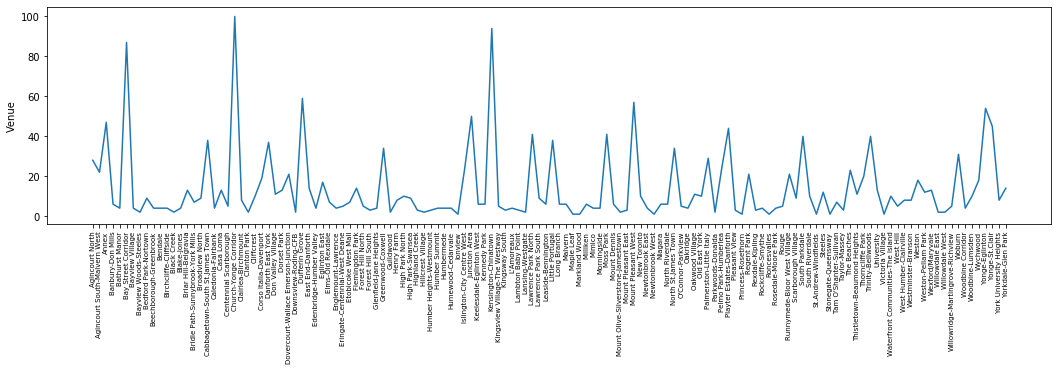

In [218]:
count_toronto = crime_toronto_df_venues.groupby('Neighbourhood',sort=False).count()
plt.figure(figsize=(18,4))
plt.xticks(rotation=90,**{'fontsize':'x-small'})
sns.lineplot(x=count_toronto.index.values,y=count_toronto['Venue'])

#### Let's find out how many unique categories can be curated from all the returned venues

In [54]:
print('There are {} unique categories.'.format(len(crime_toronto_df_venues['Venue Category'].unique())))

There are 280 unique categories.


### Analyze Each Neighborhood

In [55]:
# one hot encoding
crime_toronto_df_onehot = pd.get_dummies(crime_toronto_df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
crime_toronto_df_onehot['Neighbourhood'] = crime_toronto_df_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [crime_toronto_df_onehot.columns[-1]] + list(crime_toronto_df_onehot.columns[:-1])
crime_toronto_df_onehot = crime_toronto_df_onehot[fixed_columns]

crime_toronto_df_onehot.head()

Neighbourhood  Accessories Store  Afghan Restaurant  African Restaurant  \
0  Yonge-St.Clair                  0                  0                   0   
1  Yonge-St.Clair                  0                  0                   0   
2  Yonge-St.Clair                  0                  0                   0   
3  Yonge-St.Clair                  0                  0                   0   
4  Yonge-St.Clair                  0                  0                   0   

   Airport Service  American Restaurant  Animal Shelter  Antique Shop  Arcade  \
0                0                    0               0             0       0   
1                0                    0               0             0       0   
2                0                    0               0             0       0   
3                0                    0               0             0       0   
4                0                    0               0             0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Dealership  Auto Garage  \
0                 0                   0                0            0   
1                 0                   0                0            0   
2                 0                   0                0            0   
3                 0                   0                0            0   
4                 0                   0                0            0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0                0          0           0           0       0     0    0   
1                0          0           0           0       0     0    0   
2                0          0           0           0       0     0    0   
3                0          0           0           0       0     0    0   
4                0          0           0           1       0     0    0   

   Baseball Field  Beach  Beach Bar  Beer Bar  Beer Store  Belgian Restaurant  \
0               0      0          0         0           0                   0   
1               0      0          0         0           0                   0   
2               0      0          0         0           0                   0   
3               0      0          0         0           0                   0   
4               0      0          0         0           0                   0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bistro  Bookstore  \
0              0                         0          0       0          0   
1              0                         0          0       0          0   
2              0                         0          0       0          0   
3              0                         0          0       0          0   
4              0                         0          0       0          0   

   Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0         0              0                     0               0        0   
1         0              0                     0               0        0   
2         0              0                     0               0        0   
3         0              0                     0               0        0   
4         0              0                     0               0        0   

   Bridal Shop  Bubble Tea Shop  Buffet  Building  Burger Joint  \
0            0                0       0         0             0   
1            0                0       0         0             0   
2            0                0       0         0             0   
3            0      

And let's examine the new dataframe size.

In [56]:
crime_toronto_df_onehot.shape

(1905, 281)

#### Next, let's group rows by neighborhood and by taking the sum of the frequency of occurrence of each category

In [224]:
crime_toronto_df_grouped = crime_toronto_df_onehot.groupby('Neighbourhood',sort=False).sum().reset_index()
crime_toronto_df_grouped.head()

Neighbourhood  Accessories Store  Afghan Restaurant  \
0           Yonge-St.Clair                  0                  0   
1  York University Heights                  0                  0   
2         Lansing-Westgate                  0                  0   
3       Yorkdale-Glen Park                  0                  0   
4      Stonegate-Queensway                  0                  0   

   African Restaurant  Airport Service  American Restaurant  Animal Shelter  \
0                   0                0                    1               0   
1                   0                0                    0               0   
2                   0                0                    0               0   
3                   0                0                    0               0   
4                   0                0                    0               0   

   Antique Shop  Arcade  Argentinian Restaurant  Art Gallery  Art Museum  \
0             0       0                       0            0           0   
1             0       0                       0            0           0   
2             0       0                       0            0           0   
3             0       0                       0            0           0   
4             0       0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Dealership  \
0                    0                 0                   1                0   
1                    0                 0                   0                0   
2                    0                 0                   0                0   
3                    0                 0                   0                0   
4                    0                 0                   0                0   

   Auto Garage  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0                0          0           0           2       1   
1            0                0          0           0           0       0   
2            0                0          0           0           0       0   
3            0                0          0           0           0       0   
4            0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Beach  Beach Bar  Beer Bar  Beer Store  \
0     1    0               0      0          0         0           0   
1     0    0               0      0          0         0           0   
2     0    0               0      0          0         0           0   
3     1    0               0      0          0         0           0   
4     0    0               0      0          0         0           0   

   Belgian Restaurant  Big Box Store  Bike Rental / Bike Share  Bike Shop  \
0                   0              0                         0          0   
1                   0              1                         0          0   
2                   0              0                         0          0   
3                   0              0                         0          0   
4                   0              0                         0          0   

   Bistro  Bookstore  Boutique  Bowling Alley  Brazilian Restaurant  \
0       0          0         0              0                     0   
1       0          0         0              0                     0   
2       0          0         0              0                     0   
3       0          1         0              1                     0   
4       0          0         0              0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Buffet  Building  \
0               0        0            0                0       0         0   
1               0        0            0                0       0         0   
2               0        0            0                0       0         0   
3               0        0            0                0       0         0   
4  

#### Let's confirm the new size

In [225]:
crime_toronto_df_grouped.shape

(136, 281)

#### Join crime data from crime_toronto_df to venues data

In [226]:
crime_toronto_df_grouped = crime_toronto_df_grouped.merge(crime_toronto_df)

<a id='part9'></a>

### Part 9 : Retreive and append Venues data for New York neighbourhoods

In [61]:
crime_nyc_df_venues = getNearbyVenues(names=crime_nyc_df['Neighbourhood'],
                                   latitudes=crime_nyc_df['Latitude'],
                                   longitudes=crime_nyc_df['Longitude']
                                  )

0 : Hugh L Carey Tunnel, New York, NY 10004
1 : 7 Catherine St, New York, NY 10038
2 : 744 Greenwich St, New York, NY 10014
3 : 271 Henry St, New York, NY 10002
4 : 119 Avenue B, New York, NY 10009
5 : 643 W 24th St, New York, NY 10011
6 : 7 Peter Cooper Rd, New York, NY 10010
7 : 107 W 37th St, New York, NY 10018
8 : 489 E 41st St, New York, NY 10017
9 : 548 W 53rd St, New York, NY 10019
10 : 338 E 80th St, New York, NY 10075
11 : 307 W 71st St, New York, NY 10023
12 : New York, NY 10028
13 : 327 E 105th St, New York, NY 10029
14 : 824 West End Ave, New York, NY 10025
15 : 505 E 120th St, New York, NY 10035
16 : 3096 Broadway, New York, NY 10027
17 : 141 W 118th St, New York, NY 10026
18 : 639 W 142nd St, New York, NY 10031
19 : 52 Macombs Pl, New York, NY 10039
20 : 193 Fort Washington Ave, New York, NY 10032
21 : 608 W 204th St, New York, NY 10034
22 : 350 Powers Ave, Bronx, NY 10454
23 : 420 Tiffany St, Bronx, NY 10474
24 : 641 E 169th St, Bronx, NY 10456
25 : 1984 Randall Ave, Bro

#### The size of the resulting dataframe

In [62]:
print(crime_nyc_df_venues.shape)
crime_nyc_df_venues.head()

(5651, 7)


Neighbourhood  Neighbourhood Latitude  \
0  Hugh L Carey Tunnel, New York, NY 10004               40.701709   
1  Hugh L Carey Tunnel, New York, NY 10004               40.701709   
2  Hugh L Carey Tunnel, New York, NY 10004               40.701709   
3  Hugh L Carey Tunnel, New York, NY 10004               40.701709   
4  Hugh L Carey Tunnel, New York, NY 10004               40.701709   

   Neighbourhood Longitude               Venue  Venue Latitude  \
0               -74.015542        Battery Park       40.703217   
1               -74.015542        Clipper City       40.701608   
2               -74.015542  Table Green Kiosks       40.702460   
3               -74.015542           Blacktail       40.704537   
4               -74.015542        Naya Express       40.702565   

   Venue Longitude       Venue Category  
0       -74.015795                 Park  
1       -74.016112        Boat or Ferry  
2       -74.016217          Snack Place  
3       -74.017281         Cocktail Bar  
4       -74.012168  Lebanese Restaurant

Let's check how many venues were returned for each neighbourhood

In [63]:
crime_nyc_df_venues.groupby('Neighbourhood',sort=False).count()

Neighbourhood Latitude  \
Neighbourhood                                                          
Hugh L Carey Tunnel, New York, NY 10004                          100   
7 Catherine St, New York, NY 10038                               100   
744 Greenwich St, New York, NY 10014                             100   
271 Henry St, New York, NY 10002                                 100   
119 Avenue B, New York, NY 10009                                 100   
643 W 24th St, New York, NY 10011                                100   
7 Peter Cooper Rd, New York, NY 10010                            100   
107 W 37th St, New York, NY 10018                                100   
489 E 41st St, New York, NY 10017                                100   
548 W 53rd St, New York, NY 10019                                100   
338 E 80th St, New York, NY 10075                                100   
307 W 71st St, New York, NY 10023                                100   
New York, NY 10028                                               100   
327 E 105th St, New York, NY 10029                               100   
824 West End Ave, New York, NY 10025                             100   
505 E 120th St, New York, NY 10035                               100   
3096 Broadway, New York, NY 10027                                100   
141 W 118th St, New York, NY 10026                               100   
639 W 142nd St, New York, NY 10031                               100   
52 Macombs Pl, New York, NY 10039                                100   
193 Fort Washington Ave, New York, NY 10032                      100   
608 W 204th St, New York, NY 10034                               100   
350 Powers Ave, Bronx, NY 10454                                   77   
420 Tiffany St, Bronx, NY 10474                                   24   
641 E 169th St, Bronx, NY 10456                                   18   
1984 Randall Ave, Bronx, NY 10473                                 41   
85 McClellan St, Bronx, NY 10452                                 100   
1430 Outlook Ave, Bronx, NY 10465                                  4   
1891 Harrison Ave, Bronx, NY 10453                                60   
1125 E 231st St, Bronx, NY 10466                                  34   
710 E 180th St, Bronx, NY 10457                                   99   
2053 Yates Ave, Bronx, NY 10461                                   56   
Bronx, NY 10463                                                  100   
200 E 196th St, Bronx, NY 10458                                  100   
2824 W 17th St, Brooklyn, NY 11224                               100   
5 Frank Ct, Brooklyn, NY 11229                                    24   
2151 Bath Ave, Brooklyn, NY 11214                                100   
11N, Brooklyn, NY 11234                                           10   
4317 17th Ave, Brooklyn, NY 11204                                 45   
483 E 48th St, Brooklyn, NY 11203                                 60   
356 83rd St, Brooklyn, NY 11209                                  100   
654 E 17th St, Brooklyn, NY 11230                                 86   
430 Lefferts Ave, Brooklyn, NY 11225                              35   
Brooklyn, NY 11232                                               100   
1504 E New York Ave, Brooklyn, NY 11212                           71   
Brooklyn, NY 11236                                                 8   
147 Richards St, Brooklyn, NY 11231                              100   
175 New York Ave, Brooklyn, NY 11216                             100   
541 1st St, Brooklyn, NY 11215                                   100   
673 Lafayette Ave, Brooklyn, NY 11216                            100   
885 Gates Ave, Brooklyn, NY 11221                                100   
389 Central Ave, Brooklyn, NY 11221                              100   
225 Cadman Plz E, Brooklyn, NY 11201                             100   
8th St, Brooklyn, NY 11251                                       100   
342 Devoe St, 

#### Let's find out how many unique categories can be curated from all the returned venues

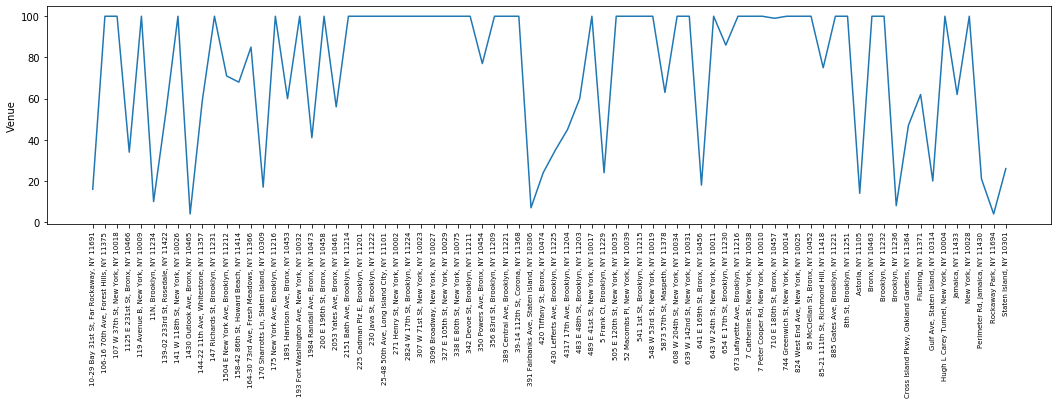

In [257]:
count_nyc = crime_nyc_df_venues.groupby('Neighbourhood',sort=False).count()
plt.figure(figsize=(18,4))
plt.xticks(rotation=90,**{'fontsize':'x-small'})
sns.lineplot(x=count_nyc.index.values,y=count_nyc['Venue'])

In [64]:
print('There are {} unique categories.'.format(len(crime_nyc_df_venues['Venue Category'].unique())))

There are 391 unique categories.


### Analyze Each Neighborhood

In [65]:
# one hot encoding
crime_nyc_df_onehot = pd.get_dummies(crime_nyc_df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
crime_nyc_df_onehot['Neighbourhood'] = crime_nyc_df_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [crime_nyc_df_onehot.columns[-1]] + list(crime_nyc_df_onehot.columns[:-1])
crime_nyc_df_onehot = crime_nyc_df_onehot[fixed_columns]

crime_nyc_df_onehot.head()

Neighbourhood  ATM  Accessories Store  \
0  Hugh L Carey Tunnel, New York, NY 10004    0                  0   
1  Hugh L Carey Tunnel, New York, NY 10004    0                  0   
2  Hugh L Carey Tunnel, New York, NY 10004    0                  0   
3  Hugh L Carey Tunnel, New York, NY 10004    0                  0   
4  Hugh L Carey Tunnel, New York, NY 10004    0                  0   

   Adult Boutique  Afghan Restaurant  African Restaurant  Airport Food Court  \
0               0                  0                   0                   0   
1               0                  0                   0                   0   
2               0                  0                   0                   0   
3               0                  0                   0                   0   
4               0                  0                   0                   0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Amphitheater  Animal Shelter  Antique Shop  Aquarium  Arcade  \
0             0               0             0         0       0   
1             0               0             0         0       0   
2             0               0             0         0       0   
3             0               0             0         0       0   
4             0               0             0         0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Australian Restaurant  Austrian Restaurant  \
0                   0                      0                    0   
1                   0                      0                    0   
2                   0                      0                    0   
3                   0                      0                    0   
4                   0                      0                    0   

   Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0            0          0           0           0       0     0    0   
1            0          0           0           0       0     0    0   
2            0          0           0           0       0     0    0   
3            0          0           0           0       0     0    0   
4            0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0               0                 0                 0                   0   
1               0                 0                 0                   0   
2               0                 0                 0                   0   
3               0                 0                 0                   0   
4               0                 0                 0                   0   

   Bay  Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0    0      0                0         0           

And let's examine the new dataframe size.

In [66]:
crime_nyc_df_onehot.shape

(5651, 392)

#### Next, let's group rows by neighborhood and by taking the sum of the frequency of occurrence of each category

In [227]:
crime_nyc_df_grouped = crime_nyc_df_onehot.groupby('Neighbourhood',sort=False).sum().reset_index()
crime_nyc_df_grouped.head()

Neighbourhood  ATM  Accessories Store  \
0  Hugh L Carey Tunnel, New York, NY 10004    0                  1   
1       7 Catherine St, New York, NY 10038    0                  0   
2     744 Greenwich St, New York, NY 10014    0                  1   
3         271 Henry St, New York, NY 10002    0                  0   
4         119 Avenue B, New York, NY 10009    0                  0   

   Adult Boutique  Afghan Restaurant  African Restaurant  Airport Food Court  \
0               0                  0                   0                   0   
1               0                  0                   0                   0   
2               0                  0                   0                   0   
3               0                  0                   0                   0   
4               0                  0                   0                   0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    2   
1               0                0                 0                    3   
2               0                0                 0                    4   
3               0                0                 0                    3   
4               0                0                 0                    1   

   Amphitheater  Animal Shelter  Antique Shop  Aquarium  Arcade  \
0             0               0             0         0       0   
1             0               1             0         0       0   
2             0               0             0         0       0   
3             0               0             0         0       0   
4             0               0             0         0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           1   
3                 0                       1            4           0   
4                 1                       1            1           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 1   
2                    0                     0                 0   
3                    0                     0                 2   
4                    1                     0                 1   

   Athletics & Sports  Australian Restaurant  Austrian Restaurant  \
0                   0                      0                    0   
1                   0                      1                    1   
2                   0                      0                    0   
3                   0                      1                    1   
4                   0                      0                    0   

   Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0            0          0           0           1       1     0    4   
1            0          0           0           0       3     0    1   
2            0          1           0           0       3     0    1   
3            0          0           0           1       1     0    3   
4            0          0           0           1       2     0    3   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0               0                 0                 0                   0   
1               0                 0                 0                   0   
2               0                 0                 0                   0   
3               0                 0                 1                   0   
4               0                 0                 0                   0   

   Bay  Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0    0      0                0         0           

#### Let's confirm the new size

In [228]:
crime_nyc_df_grouped.shape

(76, 392)

#### Join crime data from crime_nyc_df to venues data

In [229]:
crime_nyc_df_grouped = crime_nyc_df_grouped.merge(crime_nyc_df)


In [230]:
crime_nyc_df_grouped.shape

(76, 401)

In [231]:
crime_toronto_df_grouped.shape

(136, 290)

In [232]:
sparse_cols=crime_nyc_df_grouped.columns[crime_nyc_df_grouped[crime_nyc_df_grouped==0].count()>crime_nyc_df_grouped.shape[0]-2].values
crime_nyc_df_grouped.drop(columns=sparse_cols,inplace=True)
crime_nyc_df_grouped.shape

(76, 300)

In [233]:
sparse_cols=crime_toronto_df_grouped.columns[crime_toronto_df_grouped[crime_toronto_df_grouped==0].count()==crime_toronto_df_grouped.shape[0]-2].values
crime_toronto_df_grouped.drop(columns=sparse_cols,inplace=True)
crime_toronto_df_grouped.shape

(136, 240)

In [268]:
def plot_dist_matrix(df):
    
    from scipy.spatial.distance import cdist
    import seaborn as sns
    matrix = MinMaxScaler().fit_transform(df)
    Y = cdist(matrix,matrix)
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    
    sns.heatmap(Y,ax=ax1)
    sns.heatmap(np.sort(np.sort(Y,axis=0),axis=1),ax=ax2)
    
    ax1.set_title('Unsorted Distance Matrix')
    ax2.set_title('Sorted Distance Matrix')
    
    plt.show   

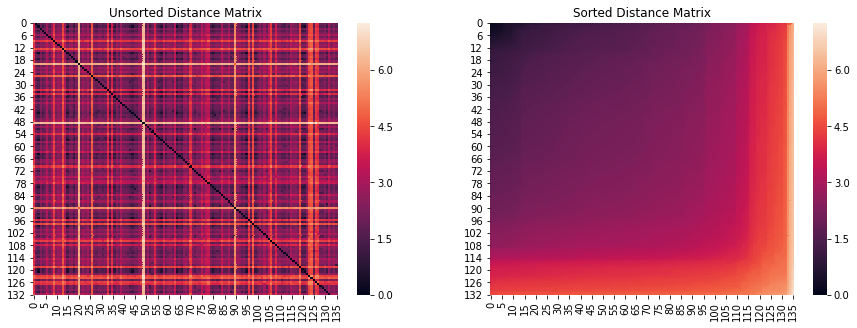

In [269]:
crime_toronto_df_grouped_clustering = crime_toronto_df_grouped.drop('Neighbourhood', 1)
plot_dist_matrix(crime_toronto_df_grouped_clustering)

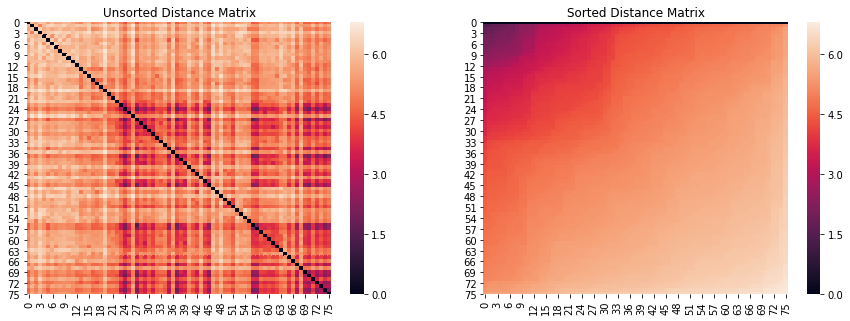

In [270]:
crime_nyc_df_grouped_clustering = crime_nyc_df_grouped.drop('Neighbourhood', 1)
plot_dist_matrix(crime_nyc_df_grouped_clustering)

<a id='part10'></a>

### Part 10: Cluster Neighborhoods for New York and Toronto seperately

#### Instead of using only top 10 venues for clustering neighbourhoods, we shall use all the venues in a negibourhood for clustering

Run *k*-means to cluster the neighborhood for Toronto.

In [287]:
def plot_silhouette(df,K=range(2,15)):
    from sklearn.metrics import silhouette_score
    silhouette = []
    for k in K:
        mms=MinMaxScaler()
        mms.fit(df)
        X = mms.transform(df)
        km=KMeans(n_clusters=k,n_init=200)
        km.fit(X)
        silhouette.append(silhouette_score(X,km.labels_))
    plt.plot(K, silhouette,)
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('silhouette method')
    plt.show()

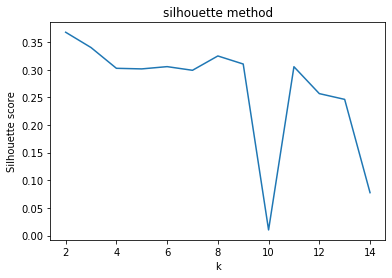

In [288]:
plot_silhouette(crime_toronto_df_grouped_clustering)

In [289]:
# set number of clusters to 6 based on silhouette method
kclusters = 6
N_INIT = 200

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init = N_INIT,verbose=True,algorithm='full')

#Pipeline with scaling and kmeans
cluster_toronto = Pipeline([('scaler',MinMaxScaler()),('kmeans',kmeans)])

cluster_toronto.fit(crime_toronto_df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
cluster_toronto['kmeans'].labels_[0:10] 

Initialization complete
Iteration  0, inertia 755.812
Iteration  1, inertia 544.703
Iteration  2, inertia 538.529
Iteration  3, inertia 537.723
Iteration  4, inertia 537.467
Converged at iteration 4: center shift 0.000000e+00 within tolerance 2.090206e-06
Initialization complete
Iteration  0, inertia 664.606
Iteration  1, inertia 589.668
Iteration  2, inertia 586.602
Iteration  3, inertia 581.886
Converged at iteration 3: center shift 0.000000e+00 within tolerance 2.090206e-06
Initialization complete
Iteration  0, inertia 762.245
Iteration  1, inertia 558.140
Iteration  2, inertia 542.495
Iteration  3, inertia 540.319
Iteration  4, inertia 538.622
Iteration  5, inertia 538.298
Iteration  6, inertia 538.116
Iteration  7, inertia 537.975
Iteration  8, inertia 537.801
Converged at iteration 8: center shift 0.000000e+00 within tolerance 2.090206e-06
Initialization complete
Iteration  0, inertia 761.100
Iteration  1, inertia 573.879
Iteration  2, inertia 572.292
Iteration  3, inertia 571.44

array([0, 5, 5, 5, 5, 5, 1, 5, 1, 1], dtype=int32)

#### Let's create a new dataframe that includes the cluster label as well as the crime and venues for each neighborhood.

In [290]:
# add clustering labels
crime_toronto_df_grouped.insert(loc=0,column='Cluster Labels', value= cluster_toronto['kmeans'].labels_)

#### Visualize the resulting clusters

In [291]:
# create map
map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(crime_toronto_df_grouped['Latitude'], crime_toronto_df_grouped['Longitude'],crime_toronto_df_grouped['Neighbourhood'], crime_toronto_df_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Run Kmeans for new York

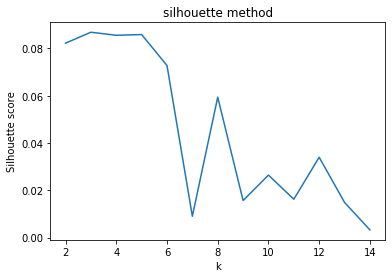

In [294]:
crime_nyc_df_grouped_clustering = crime_nyc_df_grouped.drop('Neighbourhood', 1)
plot_silhouette(crime_nyc_df_grouped_clustering)

In [295]:
kclusters = 5
N_INIT = 200

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init = N_INIT,verbose=True,algorithm='full')

#Pipeline with scaling and kmeans
cluster_nyc = Pipeline([('scaler',MinMaxScaler()),('kmeans',kmeans)])
cluster_nyc.fit(crime_nyc_df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
cluster_nyc['kmeans'].labels_[0:10] 

Initialization complete
Iteration  0, inertia 1523.683
Iteration  1, inertia 885.440
Iteration  2, inertia 874.401
Converged at iteration 2: center shift 0.000000e+00 within tolerance 4.354377e-06
Initialization complete
Iteration  0, inertia 1197.446
Iteration  1, inertia 903.483
Converged at iteration 1: center shift 0.000000e+00 within tolerance 4.354377e-06
Initialization complete
Iteration  0, inertia 1132.296
Iteration  1, inertia 920.615
Converged at iteration 1: center shift 0.000000e+00 within tolerance 4.354377e-06
Initialization complete
Iteration  0, inertia 1454.317
Iteration  1, inertia 851.158
Iteration  2, inertia 848.325
Converged at iteration 2: center shift 0.000000e+00 within tolerance 4.354377e-06
Initialization complete
Iteration  0, inertia 1238.205
Iteration  1, inertia 913.456
Converged at iteration 1: center shift 0.000000e+00 within tolerance 4.354377e-06
Initialization complete
Iteration  0, inertia 1307.837
Iteration  1, inertia 907.686
Converged at iterati

array([1, 4, 2, 4, 2, 1, 2, 2, 2, 2], dtype=int32)

In [296]:
cluster_nyc['kmeans'].labels_.shape

(76,)

#### Let's create a new dataframe that includes the cluster label as well as the crime and venues for each neighborhood.

In [297]:
# add clustering labels
crime_nyc_df_grouped.insert(0, 'Cluster Labels', cluster_nyc['kmeans'].labels_)

#### Visualize the resulting clusters

In [298]:
# create map
map_clusters = folium.Map(location=[latitude_nyc, longitude_nyc], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(crime_nyc_df_grouped['Latitude'], crime_nyc_df_grouped['Longitude'],crime_nyc_df_grouped['Neighbourhood'], crime_nyc_df_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='part11'></a>

### Part 11 : Compare and cluster similar neighbourhoods between New York and Toronto

In [299]:
#Find columns present in Toronto but not in New York 
missing_in_nyc = np.setdiff1d(crime_toronto_df_grouped.columns.values,crime_nyc_df_grouped.columns.values)
missing_in_nyc

array(['Afghan Restaurant', 'Animal Shelter', 'Auto Dealership',
       'Automotive Shop', 'Baby Store', 'Beach Bar', 'Belgian Restaurant',
       'Bike Rental / Bike Share', 'Bike Shop', 'Bridal Shop', 'Buffet',
       'Business Service', 'Castle', 'Chocolate Shop', 'Church',
       'Churrascaria', 'College Football Field', 'College Quad',
       'College Rec Center', 'College Stadium', 'Costume Shop',
       'Coworking Space', 'Creperie', 'Curling Ice',
       'Egyptian Restaurant', 'Field', 'Food Service', 'Football Stadium',
       'Golf Driving Range', 'Hockey Arena', 'Hostel',
       'Hotpot Restaurant', 'Indian Chinese Restaurant', 'Irish Pub',
       'Lake', 'Library', 'Locksmith', 'Moving Target', 'Music Store',
       'Nightlife Spot', 'North Indian Restaurant', 'Other Repair Shop',
       'Pakistani Restaurant', 'Pastry Shop', 'Persian Restaurant',
       'Platform', 'Poke Place', 'Pool Hall', 'Portuguese Restaurant',
       'Poutine Place', 'Rock Club', 'Soccer Stadium', 'S

In [300]:
crime_nyc_df_grouped = pd.concat([crime_nyc_df_grouped,pd.DataFrame(columns=list(missing_in_nyc))],sort = False)
crime_nyc_df_grouped.fillna(0,inplace=True)

In [301]:
#Find columns present in New York but not in Toronto 
missing_in_toronto = np.setdiff1d(crime_nyc_df_grouped.columns.values,crime_toronto_df_grouped.columns.values)
missing_in_toronto

array(['African Restaurant', 'Airport Lounge', 'Arepa Restaurant',
       'Australian Restaurant', 'Austrian Restaurant', 'Baseball Stadium',
       'Basketball Court', 'Beach', 'Beer Bar', 'Beer Garden',
       'Big Box Store', 'Bike Trail', 'Boat or Ferry', 'Boxing Gym',
       'Bridge', 'Building', 'Burrito Place', 'Bus Station',
       'Cajun / Creole Restaurant', 'Cantonese Restaurant',
       'Caucasian Restaurant', 'Check Cashing Service', 'Climbing Gym',
       'Comic Shop', 'Community Center', 'Construction & Landscaping',
       'Cuban Restaurant', 'Cycle Studio', 'Distillery', 'Dive Bar',
       'Eastern European Restaurant', 'Empanada Restaurant',
       'English Restaurant', 'Ethiopian Restaurant', 'Event Space',
       'Exhibit', 'Factory', 'Filipino Restaurant',
       'Financial or Legal Service', 'Fish & Chips Shop', 'Food',
       'Food Court', 'Fountain', 'Frozen Yogurt Shop',
       'Fruit & Vegetable Store', 'Garden', 'Garden Center', 'Gay Bar',
       'German Rest

In [302]:
crime_toronto_df_grouped = pd.concat([crime_toronto_df_grouped,pd.DataFrame(columns=list(missing_in_toronto))],sort = False)
crime_toronto_df_grouped.fillna(0,inplace=True)
crime_toronto_df_grouped

Cluster Labels                        Neighbourhood  Accessories Store  \
0               0.0                       Yonge-St.Clair                0.0   
1               5.0              York University Heights                0.0   
2               5.0                     Lansing-Westgate                0.0   
3               5.0                   Yorkdale-Glen Park                0.0   
4               5.0                  Stonegate-Queensway                0.0   
5               5.0               Tam O'Shanter-Sullivan                0.0   
6               1.0                          The Beaches                0.0   
7               5.0         Thistletown-Beaumond Heights                0.0   
8               1.0                     Thorncliffe Park                0.0   
9               1.0                   Danforth East York                0.0   
10              5.0                   Humewood-Cedarvale                0.0   
11              5.0           Islington-City Centre West                0.0   
12              5.0                  Scarborough Village                0.0   
13              1.0                       South Parkdale                1.0   
14              5.0                      South Riverdale                0.0   
15              5.0                 St.Andrew-Windfields                0.0   
16              5.0                        Taylor-Massey                0.0   
17              5.0                        Humber Summit                0.0   
18              5.0                           Humbermede                0.0   
19              5.0               Centennial Scarborough                0.0   
20              3.0                Church-Yonge Corridor                0.0   
21              5.0                  Clairlea-Birchmount                0.0   
22              1.0                           Cliffcrest                0.0   
23              5.0                      Flemingdon Park                0.0   
24              1.0               Corso Italia-Davenport                0.0   
25              5.0                              Ionview                0.0   
26              0.0                        Junction Area                0.0   
27              5.0                      Broadview North                0.0   
28              5.0                   Princess-Rosethorn                0.0   
29              5.0                      North Riverdale                0.0   
30              5.0                  Etobicoke West Mall                0.0   
31              5.0                    Forest Hill North                0.0   
32              5.0               Glenfield-Jane Heights                0.0   
33              1.0                    Greenwood-Coxwell                0.0   
34              5.0                            Guildwood                0.0   
35              5.0                    Trinity-Bellwoods                0.0   
36              5.0                     Victoria Village                0.0   
37              1.0    Waterfront Communities-The Island                0.0   
38              5.0                            West Hill                0.0   
39              5.0               West Humber-Clairville                0.0   
40              5.0                  Westminster-Branson                0.0   
41              5.0                         Kennedy Park                0.0   
42              5.0        Kingsview Village-The Westway                0.0   
43              5.0                Bayview Woods-Steeles                0.0   
44              5.0                         Clanton Park                0.0   
45              5.0             Keelesdale-Eglinton West                0.0   
46              5.0                    O'Connor-Parkview                0.0   
47              1.0                        Old East York                0.0   
48              5.0                            Casa Loma                0.0   
49              4.0                 Kensington-Chinatow

In [303]:
crime_nyc_df_grouped.shape

(76, 361)

In [304]:
crime_toronto_df_grouped.shape

(136, 361)

In [305]:
crime_nyc_df_grouped['City'] = 'NYC'
crime_toronto_df_grouped['City'] = 'Toronto'

In [306]:
crime_nyc_df_grouped['Latitude'] = crime_nyc_df_grouped['Latitude'] - latitude_nyc
crime_nyc_df_grouped['Longitude'] = crime_nyc_df_grouped['Longitude'] - longitude_nyc


In [307]:
crime_toronto_df_grouped['Latitude'] = crime_toronto_df_grouped['Latitude'] - latitude_toronto
crime_toronto_df_grouped['Longitude'] = crime_toronto_df_grouped['Longitude'] - longitude_toronto

In [308]:
crime_nyc_df_grouped.shape

(76, 362)

In [309]:
crime_toronto_df_grouped.shape

(136, 362)

In [310]:
combined_df = pd.concat([crime_nyc_df_grouped,crime_toronto_df_grouped],sort=False)
print(combined_df.shape)

(212, 362)


array(['Cluster Labels', 'Neighbourhood', 'Accessories Store',
       'African Restaurant', 'Airport Lounge', 'Airport Service',
       'American Restaurant', 'Antique Shop', 'Arcade',
       'Arepa Restaurant', 'Argentinian Restaurant', 'Art Gallery',
       'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant',
       'Athletics & Sports', 'Australian Restaurant',
       'Austrian Restaurant', 'Auto Garage', 'BBQ Joint', 'Bagel Shop',
       'Bakery', 'Bank', 'Bar', 'Baseball Field', 'Baseball Stadium',
       'Basketball Court', 'Beach', 'Beer Bar', 'Beer Garden',
       'Beer Store', 'Big Box Store', 'Bike Trail', 'Bistro',
       'Boat or Ferry', 'Bookstore', 'Boutique', 'Bowling Alley',
       'Boxing Gym', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery',
       'Bridge', 'Bubble Tea Shop', 'Building', 'Burger Joint',
       'Burrito Place', 'Bus Line', 'Bus Station', 'Bus Stop', 'Butcher',
       'Café', 'Cajun / Creole Restaurant', 'Candy Store',
       'Cantonese Restaur

In [311]:
sparse_cols=combined_df.columns[combined_df[combined_df==0].count()==combined_df.shape[0]-2].values
combined_df.drop(columns=sparse_cols,inplace=True)
combined_df.shape

(212, 326)

In [312]:
combined_df_clustering = combined_df.drop(columns=['Cluster Labels','Neighbourhood','City'])

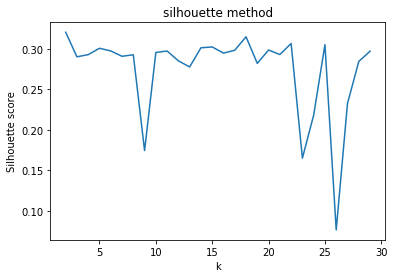

In [313]:
plot_silhouette(combined_df_clustering,K=range(2,30))

In [314]:
kclusters = 5
N_INIT = 200

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init = N_INIT,verbose=True,algorithm='full')

cluster_combined = Pipeline([('scaler',MinMaxScaler()),('kmeans',kmeans)])
cluster_combined.fit(combined_df_clustering)
cluster_combined['kmeans'].labels_[0:10]

Initialization complete
Iteration  0, inertia 1380.676
Iteration  1, inertia 1132.803
Iteration  2, inertia 1088.157
Iteration  3, inertia 1086.164
Iteration  4, inertia 1085.404
Iteration  5, inertia 1084.831
Iteration  6, inertia 1084.398
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.851791e-06
Initialization complete
Iteration  0, inertia 1464.247
Iteration  1, inertia 1157.653
Iteration  2, inertia 1075.364
Iteration  3, inertia 1055.093
Iteration  4, inertia 1048.852
Iteration  5, inertia 1048.435
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.851791e-06
Initialization complete
Iteration  0, inertia 1408.277
Iteration  1, inertia 1187.354
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.851791e-06
Initialization complete
Iteration  0, inertia 1513.829
Iteration  1, inertia 1137.581
Iteration  2, inertia 1101.271
Iteration  3, inertia 1099.943
Iteration  4, inertia 1099.441
Converged at iteration 4: center shift

array([0, 3, 0, 3, 0, 4, 0, 0, 0, 0], dtype=int32)

In [315]:
# add clustering labels
combined_df['Cluster Labels'] = cluster_combined['kmeans'].labels_

In [316]:
table = combined_df.groupby(by=['Cluster Labels','City'])['Neighbourhood'].agg('\n'.join).unstack()

In [317]:
from IPython.display import display, HTML

display(table.style.set_properties(**{'white-space': 'pre-wrap'}))
# displayHTMLtable.to_html

<a id='part12'></a>

## Part 12 : Compare various clustering algorithms on the combined data

In [318]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

default_base = {'quantile': .25,
                'eps': .005,
                'damping': .9,
                'preference': -1200,
                'n_neighbors': 10,
                'n_clusters': kclusters,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

params = default_base.copy()
#params.update(algo_params)

X = combined_df_clustering
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)

# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward',connectivity=connectivity)

spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack',affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'],min_samples=params['min_samples'],metric='cosine')

optics = cluster.OPTICS(min_samples=params['min_samples'],xi=params['xi'],min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(damping=params['damping'], preference=params['preference'])

average_linkage = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock",n_clusters=params['n_clusters'], connectivity=connectivity)

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')

spectral_bicluster = cluster.bicluster.SpectralBiclustering(n_clusters=params['n_clusters'],n_components= 250,n_best=50)

spectral_cocluster = cluster.bicluster.SpectralCoclustering(n_clusters=params['n_clusters'])

clustering_algorithms = (('MiniBatchKMeans', two_means),
                         ('AffinityPropagation', affinity_propagation),
                         ('MeanShift', ms),
                         ('SpectralClustering', spectral),
                         ('Ward', ward),
                         ('AgglomerativeClustering', average_linkage),
                         ('DBSCAN', dbscan),
                         ('OPTICS', optics),
                         ('Birch', birch),
                         ('GaussianMixture', gmm),
                         ('SpectralBiclustering',spectral_bicluster),
                         ('SpectralCoclustering',spectral_cocluster)
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    
    print("Running"+str(algorithm))
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    elif hasattr(algorithm, 'row_labels_'):
        y_pred = algorithm.row_labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
        
    combined_df['Cluster Labels']=y_pred
    tableX = combined_df.groupby(by=['Cluster Labels','City'])['Neighbourhood'].agg('count').unstack()
    display(tableX.style.set_properties(**{'white-space': 'pre-wrap'}))

RunningMiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)


RunningAffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.9, max_iter=200, preference=-1200, verbose=False)


RunningMeanShift(bandwidth=16.97339757396255, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)


RunningSpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=5, n_init=10,
                   n_jobs=None, n_neighbors=10, random_state=None)


RunningAgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<212x212 sparse matrix of type '<class 'numpy.float64'>'
	with 4076 stored elements in Compressed Sparse Row format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=5, pooling_func='deprecated')


RunningAgglomerativeClustering(affinity='cityblock', compute_full_tree='auto',
                        connectivity=<212x212 sparse matrix of type '<class 'numpy.float64'>'
	with 4076 stored elements in Compressed Sparse Row format>,
                        distance_threshold=None, linkage='average', memory=None,
                        n_clusters=5, pooling_func='deprecated')


RunningDBSCAN(algorithm='auto', eps=0.005, leaf_size=30, metric='cosine',
       metric_params=None, min_samples=20, n_jobs=None, p=None)


RunningOPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.1, min_samples=20, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)


RunningBirch(branching_factor=50, compute_labels=True, copy=True, n_clusters=5,
      threshold=0.5)


RunningGaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


RunningSpectralBiclustering(init='k-means++', method='bistochastic', mini_batch=False,
                     n_best=50, n_clusters=5, n_components=250, n_init=10,
                     n_jobs=None, n_svd_vecs=None, random_state=None,
                     svd_method='randomized')


RunningSpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=5,
                     n_init=10, n_jobs=None, n_svd_vecs=None, random_state=None,
                     svd_method='randomized')


On comparing the summary tables of clustering done by various algorithms, we can see that almost all the clustering algorithms cluster most of the neighbourhoods in one or two clusters. However, SpectralClustering produces the most granular clustering with all the clusters containing some neighbourhoods of both cities NY and Toronto.

<a id='part13'></a>

## Part 13 : Use Inductive Clustering on New York data first followed by cluster prediction for Toronto using RandomForestClassifier

We shall further try Inductive clustering by first using spectral clustering on New York Data and then using Random Forest Classifier to 

In [804]:
from sklearn.base import BaseEstimator, clone
from sklearn import cluster
#from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils.metaestimators import if_delegate_has_method

class InductiveClusterer(BaseEstimator):
    def __init__(self, clusterer, classifier):
        self.clusterer = clusterer
        self.classifier = classifier

    def fit(self, X, y=None):
        self.clusterer_ = clone(self.clusterer)
        self.classifier_ = clone(self.classifier)
        y = self.clusterer_.fit_predict(X)
        self.classifier_.fit(X, y)
        return self

    @if_delegate_has_method(delegate='classifier_')
    def predict(self, X):
        return self.classifier_.predict(X)

    @if_delegate_has_method(delegate='classifier_')
    def decision_function(self, X):
        return self.classifier_.decision_function(X)

    
X = crime_nyc_df_grouped.drop(columns=['Cluster Labels','Neighbourhood','City'])
# normalize dataset for easier parameter selection
X = MinMaxScaler().fit_transform(X)

#clusterer = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack',affinity="nearest_neighbors")
clusterer = cluster.AgglomerativeClustering(n_clusters=5,affinity='cosine',
                                            connectivity= kneighbors_graph(X, 10 , include_self=False),
                                            linkage = 'complete',compute_full_tree=True)
cluster_labels = clusterer.fit_predict(X)


# Declare the inductive learning model that it will be used to
# predict cluster membership for unknown instances
#classifier = RandomForestClassifier(n_estimators=200,random_state=0,criterion='gini',)
classifier  = KNeighborsClassifier()
inductive_learner = InductiveClusterer(clusterer, classifier).fit(X)

X_new = crime_toronto_df_grouped.drop(columns=['Cluster Labels','Neighbourhood','City'])
X_new = StandardScaler().fit_transform(X_new)
probable_clusters = inductive_learner.predict(X_new)



In [805]:
crime_nyc_df_grouped['Cluster Labels'] = cluster_labels
crime_toronto_df_grouped['Cluster Labels'] = probable_clusters

combined_df = pd.concat([crime_nyc_df_grouped,crime_toronto_df_grouped],sort=False)


tableX = combined_df.groupby(by=['Cluster Labels','City'])['Neighbourhood'].agg('count').unstack()
display(tableX.style.set_properties(**{'white-space': 'pre-wrap',
                                       'background-color': 'white',
                                       'color': 'black',
                                       'border-color': 'black',
                                       'border-style':'solid','border-width':'1px'}))

In [806]:
tableX_detailed = combined_df.groupby(by=['Cluster Labels','City'])['Neighbourhood'].agg("\n".join).unstack()
display(tableX_detailed.style.set_properties(**{'white-space': 'pre-wrap',
                                       'background-color': 'white',
                                       'color': 'black',
                                       'border-color': 'black',
                                       'border-style':'solid','border-width':'1px'}))

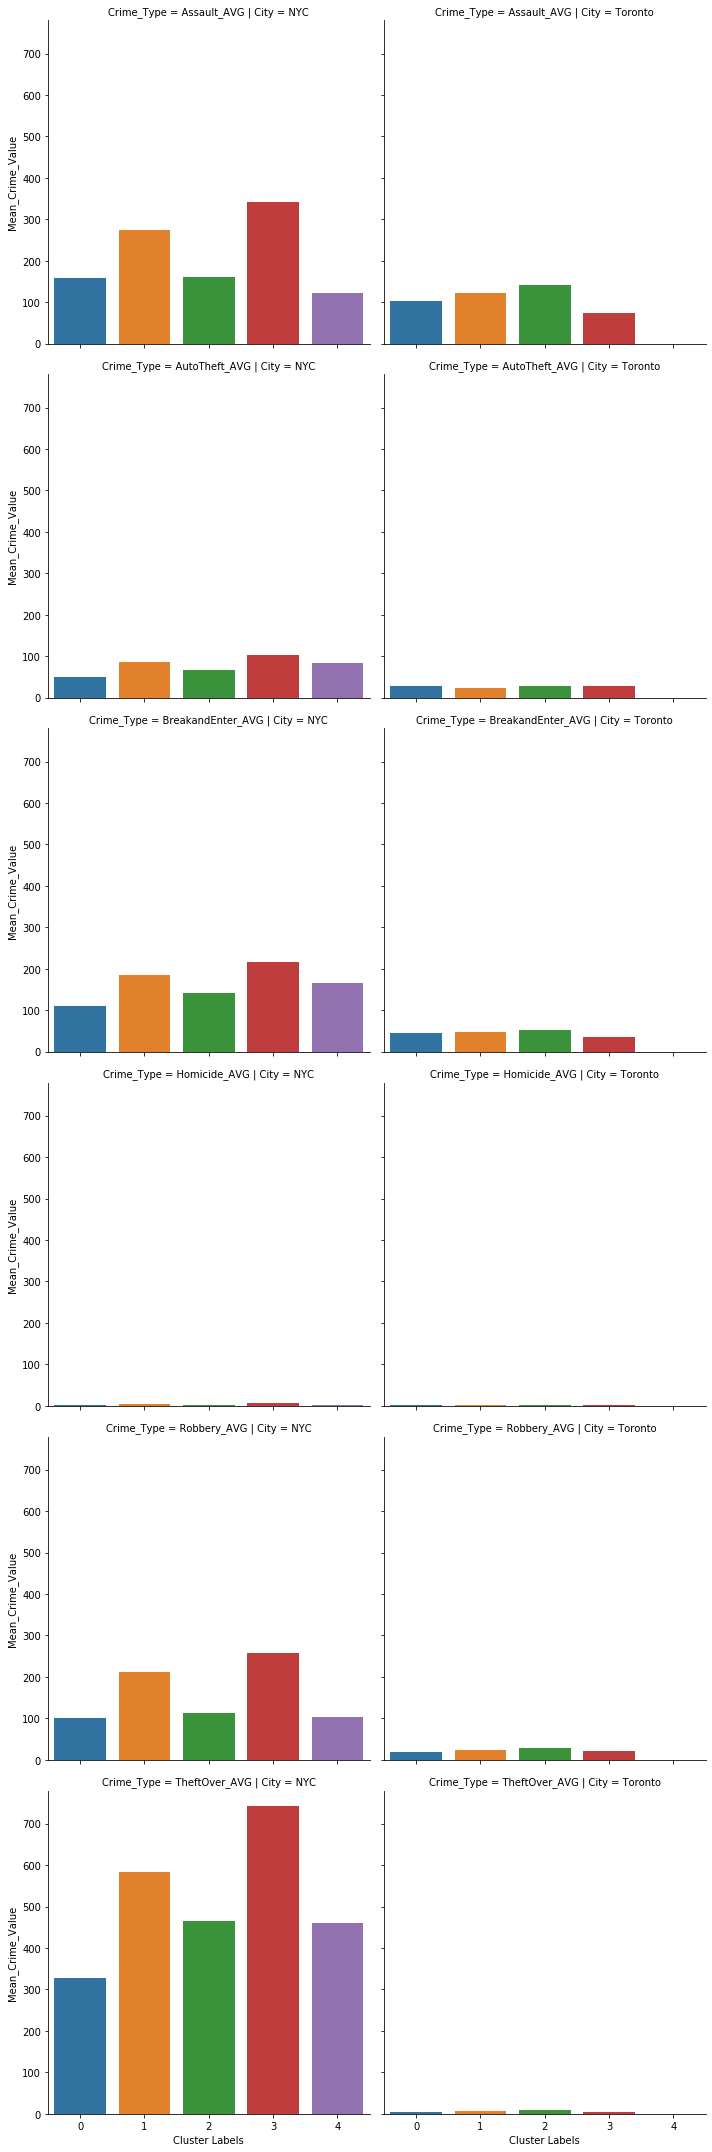

In [787]:
crime_by_cluster = combined_df.groupby(by=['Cluster Labels','City'])['Assault_AVG','AutoTheft_AVG','BreakandEnter_AVG','Robbery_AVG','TheftOver_AVG',
                                                                     'Homicide_AVG'].mean().stack()
crime_by_cluster = crime_by_cluster.reset_index()
crime_by_cluster.rename(columns={'level_2':'Crime_Type',0:'Mean_Crime_Value'},inplace=True)
crime_by_cluster.sort_values(by=['City','Crime_Type','Mean_Crime_Value'],inplace=True)
crime_by_cluster.reset_index(drop=True)
sns.catplot(x='Cluster Labels',
            y='Mean_Crime_Value',
            col = 'City',
            row='Crime_Type',
            data=crime_by_cluster,
            kind='bar')

In [788]:
filtered_columns_categories = ['Assault_AVG', 'AutoTheft_AVG', 'BreakandEnter_AVG','Robbery_AVG',
                               'TheftOver_AVG', 'Homicide_AVG', 'Shape__Area','Latitude', 'Longitude']
cluster_type_df = combined_df.drop(columns=filtered_columns_categories)

cluster_type_df.head()

Cluster Labels                            Neighbourhood  Accessories Store  \
0               1  Hugh L Carey Tunnel, New York, NY 10004                1.0   
1               1       7 Catherine St, New York, NY 10038                0.0   
2               1     744 Greenwich St, New York, NY 10014                1.0   
3               1         271 Henry St, New York, NY 10002                0.0   
4               1         119 Avenue B, New York, NY 10009                0.0   

   African Restaurant  Airport Lounge  Airport Service  American Restaurant  \
0                 0.0             0.0              0.0                  2.0   
1                 0.0             0.0              0.0                  3.0   
2                 0.0             0.0              0.0                  4.0   
3                 0.0             0.0              0.0                  3.0   
4                 0.0             0.0              0.0                  1.0   

   Antique Shop  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0           0.0     0.0               0.0                     0.0   
1           0.0     0.0               0.0                     0.0   
2           0.0     0.0               0.0                     0.0   
3           0.0     0.0               0.0                     1.0   
4           0.0     0.0               1.0                     1.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0          0.0         0.0                  0.0               0.0   
1          0.0         0.0                  0.0               1.0   
2          0.0         1.0                  0.0               0.0   
3          4.0         0.0                  0.0               2.0   
4          1.0         0.0                  1.0               1.0   

   Athletics & Sports  Australian Restaurant  Austrian Restaurant  \
0                 0.0                    0.0                  0.0   
1                 0.0                    1.0                  1.0   
2                 0.0                    0.0                  0.0   
3                 0.0                    1.0                  1.0   
4                 0.0                    0.0                  0.0   

   Auto Garage  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0.0        0.0         1.0     1.0   0.0  4.0             0.0   
1          0.0        0.0         0.0     3.0   0.0  1.0             0.0   
2          0.0        1.0         0.0     3.0   0.0  1.0             0.0   
3          0.0        0.0         1.0     1.0   0.0  3.0             0.0   
4          0.0        0.0         1.0     2.0   0.0  3.0             0.0   

   Baseball Stadium  Basketball Court  Beach  Beer Bar  Beer Garden  \
0               0.0               0.0    0.0       0.0          0.0   
1               0.0               0.0    0.0       0.0          0.0   
2               0.0               0.0    0.0       1.0          0.0   
3               0.0               1.0    0.0       0.0          0.0   
4               0.0               0.0    0.0       1.0          0.0   

   Beer Store  Big Box Store  Bike Trail  Bistro  Boat or Ferry  Bookstore  \
0         0.0            0.0         0.0     0.0            1.0        0.0   
1         0.0            0.0         0.0     0.0            0.0        0.0   
2         0.0            0.0         0.0     2.0            0.0        1.0   
3         1.0            0.0         1.0     0.0            0.0        0.0   
4         1.0            0.0         0.0     0.0            0.0        1.0   

   Boutique  Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  \
0       0.0            0.0         0.0                   0.0             0.0   
1       0.0            0.0         1.0                   0.0             0.0   
2       2.0            0.0         0.0                   0.0             0.0   
3       1.0            0.0         0.0                   0.0             0.0   
4       0.0            0.0         0.0     

In [595]:
url_categories = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
categories_list = requests.get(url_categories).json()

In [790]:
categories_df = json_normalize(data=categories_list['response'],record_path=['categories'])
#categories_df = requests.get('https://gist.githubusercontent.com/tndoan/24ea389efbe137d9a514/raw/3c0707bc65b00871e4c3398bac67742748820550/4sq_category_tree.txt')
categories_df['name']

0           Arts & Entertainment
1           College & University
2                          Event
3                           Food
4                 Nightlife Spot
5          Outdoors & Recreation
6    Professional & Other Places
7                      Residence
8                 Shop & Service
9             Travel & Transport
Name: name, dtype: object

In [653]:
def create_col_dict(df):
    
    col_dict = {}
    for col_name in df.columns.values:
        #print(col_name)
        x = categories_df['categories'].astype(str).str.find(col_name)
        #print(x)
        if (x != -1).sum() == 1:
            key= col_name
            value = categories_df['name'][x != -1].reset_index(drop=True)[0]
            print(key + ":" + value)
            col_dict.update({key:value})
    
    return(col_dict)

In [654]:
col_dict_master = create_col_dict(combined_df)

Accessories Store:Shop & Service
African Restaurant:Food
Airport Lounge:Travel & Transport
Airport Service:Travel & Transport
American Restaurant:Food
Antique Shop:Shop & Service
Arcade:Arts & Entertainment
Arepa Restaurant:Food
Argentinian Restaurant:Food
Art Gallery:Arts & Entertainment
Art Museum:Arts & Entertainment
Arts & Crafts Store:Shop & Service
Asian Restaurant:Food
Athletics & Sports:Outdoors & Recreation
Australian Restaurant:Food
Austrian Restaurant:Food
Auto Garage:Shop & Service
BBQ Joint:Food
Bagel Shop:Food
Bakery:Food
Bank:Shop & Service
Baseball Field:Outdoors & Recreation
Baseball Stadium:Arts & Entertainment
Beer Bar:Nightlife Spot
Beer Garden:Nightlife Spot
Beer Store:Shop & Service
Big Box Store:Shop & Service
Bike Trail:Outdoors & Recreation
Bistro:Food
Boat or Ferry:Travel & Transport
Boutique:Shop & Service
Bowling Alley:Arts & Entertainment
Boxing Gym:Outdoors & Recreation
Brazilian Restaurant:Food
Breakfast Spot:Food
Brewery:Nightlife Spot
Bridge:Outdoors & 

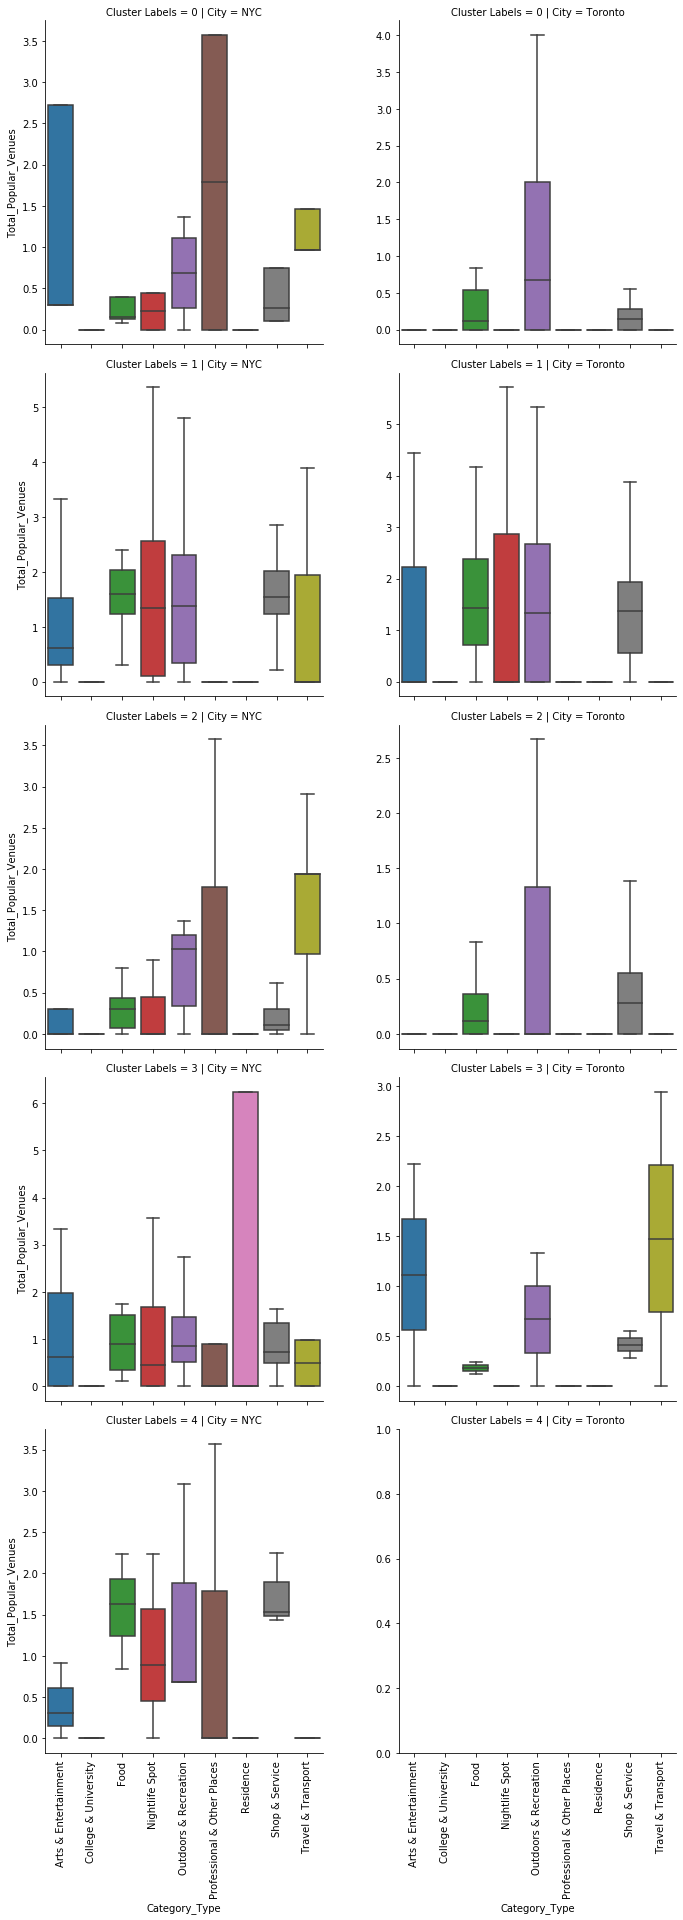

In [825]:
master_category_count = cluster_type_df.drop(columns=['City','Cluster Labels','Neighbourhood']
                                            ).groupby(axis=1, by = col_dict_master).sum()
nyc_temp = master_category_count.loc[cluster_type_df['City']=='NYC',:]
nyc_temp = 100 * nyc_temp / (nyc_temp.sum()+0.0000001)

master_category_count.loc[cluster_type_df['City']=='NYC',:] = nyc_temp
toronto_temp = master_category_count.loc[cluster_type_df['City']=='Toronto',:]
toronto_temp = 100 * toronto_temp / (toronto_temp.sum()+0.0000001)

master_category_count.loc[cluster_type_df['City']=='Toronto',:] = toronto_temp
master_category_count
master_category_count = pd.concat([cluster_type_df[['Cluster Labels', 'Neighbourhood','City']],master_category_count],sort=False,axis=1)
master_category_count = master_category_count.groupby(by=['Cluster Labels'
                                                          ,'Neighbourhood'
                                                          ,'City'
                                                         ]).mean().stack().reset_index()

master_category_count.rename(columns={'level_3':'Category_Type',0:'Total_Popular_Venues'},inplace=True)
# # #master_category_count.sort_values(by=['City','Crime_Type','Total_Popular_Venues'],inplace=True)
# # #master_category_count.reset_index(drop=True)
g= sns.catplot(row ='Cluster Labels',
            y ='Total_Popular_Venues',
            col = 'City',
            x ='Category_Type',
            data=master_category_count,
            kind='box',sharey=False,**{'showfliers':False})
g.set_xticklabels(master_category_count['Category_Type'],rotation=90)

#### Cluster 1

In [745]:
combined_df.loc[combined_df['Cluster Labels'] == 0, combined_df.columns[[1] + list(range(5, combined_df.shape[1]))]]

Neighbourhood  Airport Service  \
22          350 Powers Ave, Bronx, NY 10454              0.0   
26         85 McClellan St, Bronx, NY 10452              0.0   
28       1891 Harrison Ave, Bronx, NY 10453              0.0   
29         1125 E 231st St, Bronx, NY 10466              0.0   
33          200 E 196th St, Bronx, NY 10458              0.0   
39        483 E 48th St, Brooklyn, NY 11203              0.0   
44  1504 E New York Ave, Brooklyn, NY 11212              0.0   
9                        Danforth East York              0.0   
39                   West Humber-Clairville              0.0   
74                         Wexford/Maryvale              0.0   

    American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
22                  1.0           0.0     0.0               0.0   
26                  1.0           0.0     0.0               0.0   
28                  0.0           0.0     0.0               0.0   
29                  0.0           0.0     0.0               0.0   
33                  0.0           0.0     0.0               0.0   
39                  0.0           0.0     0.0               0.0   
44                  0.0           0.0     0.0               0.0   
9                   0.0           0.0     0.0               0.0   
39                  0.0           0.0     0.0               0.0   
74                  0.0           0.0     0.0               0.0   

    Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
22                     0.0          0.0         0.0                  0.0   
26                     0.0          0.0         1.0                  0.0   
28                     0.0          0.0         0.0                  0.0   
29                     0.0          0.0         0.0                  0.0   
33                     0.0          0.0         0.0                  0.0   
39                     0.0          0.0         0.0                  0.0   
44                     0.0          0.0         0.0                  0.0   
9                      0.0          0.0         0.0                  0.0   
39                     0.0          0.0         0.0                  0.0   
74                     0.0          0.0         0.0                  0.0   

    Asian Restaurant  Athletics & Sports  Australian Restaurant  \
22               0.0                 0.0                    0.0   
26               0.0                 1.0                    0.0   
28               0.0                 0.0                    0.0   
29               0.0                 0.0                    0.0   
33               0.0                 0.0                    0.0   
39               0.0                 0.0                    0.0   
44               0.0                 0.0                    0.0   
9                0.0                 0.0                    0.0   
39               0.0                 0.0                    0.0   
74               0.0                 0.0                    0.0   

    Austrian Restaurant  Auto Garage  BBQ Joint  Bagel Shop  Bakery  Bank  \
22                  0.0          0.0        0.0         0.0     2.0   0.0   
26                  0.0          0.0        1.0         0.0     1.0   0.0   
28                  0.0          0.0        0.0         0.0     1.0   2.0   
29                  0.0          0.0        0.0         0.0     0.0   0.0   
33                  0.0          0.0        0.0         0.0     1.0   1.0   
39                  0.0          0.0        0.0         0.0     1.0   3.0   
44                  0.0          0.0        0.0         0.0     1.0   1.0   
9                   0.0          0.0        0.0         0.0     0.0   1.0   
39                  0.0          0.0        0.0         0.0     0.0   0.0   
74                  0.0          0.0        0.0         0.0     1.0   0.0   

    Bar  Baseball Field  Baseball Stadium  Basketball Court  Beach  Beer Bar  \
22  0.0             1.0               0.0               0.0    0.0       0.0   
26  

#### Cluster 2

In [746]:
combined_df.loc[combined_df['Cluster Labels'] == 1, combined_df.columns[[1] + list(range(5, combined_df.shape[1]))]]

Neighbourhood  Airport Service  \
0       Hugh L Carey Tunnel, New York, NY 10004              0.0   
1            7 Catherine St, New York, NY 10038              0.0   
2          744 Greenwich St, New York, NY 10014              0.0   
3              271 Henry St, New York, NY 10002              0.0   
4              119 Avenue B, New York, NY 10009              0.0   
5             643 W 24th St, New York, NY 10011              0.0   
6         7 Peter Cooper Rd, New York, NY 10010              0.0   
7             107 W 37th St, New York, NY 10018              0.0   
8             489 E 41st St, New York, NY 10017              0.0   
9             548 W 53rd St, New York, NY 10019              0.0   
10            338 E 80th St, New York, NY 10075              0.0   
11            307 W 71st St, New York, NY 10023              0.0   
12                           New York, NY 10028              0.0   
14         824 West End Ave, New York, NY 10025              0.0   
23              420 Tiffany St, Bronx, NY 10474              0.0   
24              641 E 169th St, Bronx, NY 10456              0.0   
27            1430 Outlook Ave, Bronx, NY 10465              0.0   
34           2824 W 17th St, Brooklyn, NY 11224              0.0   
35               5 Frank Ct, Brooklyn, NY 11229              0.0   
37                      11N, Brooklyn, NY 11234              0.0   
38            4317 17th Ave, Brooklyn, NY 11204              0.0   
40              356 83rd St, Brooklyn, NY 11209              0.0   
41            654 E 17th St, Brooklyn, NY 11230              0.0   
43                           Brooklyn, NY 11232              0.0   
45                           Brooklyn, NY 11236              0.0   
46          147 Richards St, Brooklyn, NY 11231              0.0   
48               541 1st St, Brooklyn, NY 11215              0.0   
52         225 Cadman Plz E, Brooklyn, NY 11201              0.0   
53                   8th St, Brooklyn, NY 11251              0.0   
56                      Rockaway Park, NY 11694              0.0   
57    10-29 Bay 31st St, Far Rockaway, NY 11691              0.0   
58      85-21 111th St, Richmond Hill, NY 11418              0.0   
64   25-48 50th Ave, Long Island City, NY 11101              0.0   
65        144-22 11th Ave, Whitestone, NY 11357              0.0   
66             39-14 112th St, Corona, NY 11368              0.0   
68      106-16 70th Ave, Forest Hills, NY 11375              0.0   
69              Perimeter Rd, Jamaica, NY 11430              2.0   
70                            Astoria, NY 11105              0.0   
71                           Flushing, NY 11371             10.0   
72                      Staten Island, NY 10301              0.0   
73            Gulf Ave, Staten Island, NY 10314              0.0   
74   391 Fairbanks Ave, Staten Island, NY 10306              0.0   
75    170 Sharrotts Ln, Staten Island, NY 10309              0.0   
132                                    Wychwood              0.0   

     American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
0                    2.0           0.0     0.0               0.0   
1                    3.0           0.0     0.0               0.0   
2                    4.0           0.0     0.0               0.0   
3                    3.0           0.0     0.0               0.0   
4                    1.0           0.0     0.0               1.0   
5                    1.0           0.0     0.0               0.0   
6                    3.0           1.0     1.0               0.0   
7                    0.0           0.0     0.0               0.0   
8                    2.0           0.0     0.0               0.0   
9                    2.0           0.0     0.0               0.0   
10                   2.0           0.0     0.0               0.0   
11                   2.0           0.0     0.0               0.0   
12                   1.0           0.0     0.0               0.0   
14                   

#### Cluster 3

In [747]:
combined_df.loc[combined_df['Cluster Labels'] == 2, combined_df.columns[[1] + list(range(5, combined_df.shape[1]))]]

Neighbourhood  Airport Service  \
13            327 E 105th St, New York, NY 10029              0.0   
16             3096 Broadway, New York, NY 10027              0.0   
17            141 W 118th St, New York, NY 10026              0.0   
18            639 W 142nd St, New York, NY 10031              0.0   
19             52 Macombs Pl, New York, NY 10039              0.0   
20   193 Fort Washington Ave, New York, NY 10032              0.0   
21            608 W 204th St, New York, NY 10034              0.0   
30               710 E 180th St, Bronx, NY 10457              0.0   
31               2053 Yates Ave, Bronx, NY 10461              0.0   
32                               Bronx, NY 10463              0.0   
36             2151 Bath Ave, Brooklyn, NY 11214              0.0   
78                  Agincourt South-Malvern West              0.0   
96               Cabbagetown-South St.James Town              0.0   
127                              Little Portugal              0.0   
134                         Briar Hill-Belgravia              0.0   

     American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
13                   2.0           0.0     0.0               0.0   
16                   5.0           0.0     0.0               0.0   
17                   2.0           0.0     0.0               0.0   
18                   2.0           0.0     0.0               1.0   
19                   2.0           0.0     0.0               1.0   
20                   0.0           0.0     0.0               1.0   
21                   2.0           0.0     0.0               0.0   
30                   0.0           0.0     0.0               0.0   
31                   0.0           0.0     0.0               1.0   
32                   1.0           0.0     0.0               0.0   
36                   1.0           0.0     0.0               0.0   
78                   1.0           0.0     0.0               0.0   
96                   0.0           0.0     0.0               0.0   
127                  0.0           0.0     0.0               0.0   
134                  0.0           0.0     0.0               0.0   

     Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
13                      0.0          0.0         1.0                  0.0   
16                      0.0          1.0         0.0                  1.0   
17                      0.0          0.0         1.0                  2.0   
18                      0.0          0.0         0.0                  0.0   
19                      0.0          0.0         0.0                  2.0   
20                      0.0          0.0         1.0                  1.0   
21                      0.0          0.0         2.0                  0.0   
30                      0.0          0.0         0.0                  0.0   
31                      0.0          0.0         0.0                  0.0   
32                      0.0          0.0         0.0                  0.0   
36                      0.0          0.0         0.0                  0.0   
78                      0.0          0.0         0.0                  0.0   
96                      0.0          0.0         0.0                  0.0   
127                     0.0          0.0         0.0                  0.0   
134                     1.0          0.0         0.0                  0.0   

     Asian Restaurant  Athletics & Sports  Australian Restaurant  \
13                0.0                 0.0                    0.0   
16                0.0                 0.0                    0.0   
17                0.0                 0.0                    0.0   
18                0.0                 0.0                    0.0   
19                0.0                 0.0                    0.0   
20                0.0                 0.0                    0.0   
21                0.0                 1.0                    0.0   
30                0.0                 0.0                    0.0

#### Cluster 4

In [748]:
combined_df.loc[combined_df['Cluster Labels'] == 3, combined_df.columns[[1] + list(range(5, combined_df.shape[1]))]]

Neighbourhood  Airport Service  \
42    430 Lefferts Ave, Brooklyn, NY 11225              0.0   
47    175 New York Ave, Brooklyn, NY 11216              0.0   
49   673 Lafayette Ave, Brooklyn, NY 11216              0.0   
50       885 Gates Ave, Brooklyn, NY 11221              0.0   
51     389 Central Ave, Brooklyn, NY 11221              0.0   
54        342 Devoe St, Brooklyn, NY 11211              0.0   
55         230 Java St, Brooklyn, NY 11222              0.0   
6                              The Beaches              0.0   
33                       Greenwood-Coxwell              0.0   
70                     North St.James Town              0.0   
110                        Bayview Village              0.0   

     American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
42                   0.0           0.0     0.0               0.0   
47                   1.0           0.0     0.0               0.0   
49                   0.0           0.0     0.0               1.0   
50                   1.0           0.0     0.0               0.0   
51                   1.0           0.0     0.0               0.0   
54                   0.0           0.0     0.0               0.0   
55                   1.0           0.0     0.0               0.0   
6                    0.0           0.0     0.0               0.0   
33                   0.0           0.0     0.0               0.0   
70                   0.0           0.0     0.0               0.0   
110                  0.0           0.0     0.0               0.0   

     Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
42                      0.0          0.0         0.0                  0.0   
47                      0.0          0.0         0.0                  0.0   
49                      0.0          2.0         0.0                  0.0   
50                      0.0          1.0         0.0                  1.0   
51                      0.0          3.0         0.0                  1.0   
54                      0.0          2.0         0.0                  1.0   
55                      0.0          0.0         0.0                  1.0   
6                       0.0          0.0         0.0                  0.0   
33                      0.0          1.0         0.0                  0.0   
70                      0.0          0.0         0.0                  0.0   
110                     0.0          0.0         0.0                  0.0   

     Asian Restaurant  Athletics & Sports  Australian Restaurant  \
42                0.0                 0.0                    0.0   
47                2.0                 0.0                    0.0   
49                0.0                 0.0                    0.0   
50                2.0                 0.0                    0.0   
51                0.0                 0.0                    0.0   
54                0.0                 0.0                    0.0   
55                0.0                 0.0                    0.0   
6                 0.0                 0.0                    0.0   
33                1.0                 0.0                    0.0   
70                0.0                 0.0                    0.0   
110               0.0                 0.0                    0.0   

     Austrian Restaurant  Auto Garage  BBQ Joint  Bagel Shop  Bakery  Bank  \
42                   0.0          0.0        1.0         0.0     2.0   0.0   
47                   0.0          0.0        0.0         2.0     2.0   0.0   
49                   0.0          0.0        0.0         1.0     0.0   0.0   
50                   0.0          0.0        0.0         1.0     4.0   0.0   
51                   0.0          0.0        0.0         1.0     4.0   0.0   
54                   0.0          0.0        1.0         0.0     5.0   0.0   
55                   0.0          0.0        0.0         2.0     4.0   0.0   
6                    0.0          0.0        0.0         0.0     0.0   1.0   
33         

#### Cluster 5

In [749]:
combined_df.loc[combined_df['Cluster Labels'] == 4, combined_df.columns[[1] + list(range(5, combined_df.shape[1]))]]

Neighbourhood  Airport Service  \
15             505 E 120th St, New York, NY 10035              0.0   
25              1984 Randall Ave, Bronx, NY 10473              0.0   
59                              Jamaica, NY 11433              0.0   
60                5873 57th St, Maspeth, NY 11378              0.0   
61            139-02 233rd St, Rosedale, NY 11422              0.0   
62         158-42 86th St, Howard Beach, NY 11414              0.0   
63       164-30 73rd Ave, Fresh Meadows, NY 11366              0.0   
67   Cross Island Pkwy, Oakland Gardens, NY 11364              0.0   
0                                  Yonge-St.Clair              0.0   
1                         York University Heights              0.0   
2                                Lansing-Westgate              0.0   
3                              Yorkdale-Glen Park              0.0   
4                             Stonegate-Queensway              0.0   
5                          Tam O'Shanter-Sullivan              0.0   
7                    Thistletown-Beaumond Heights              0.0   
8                                Thorncliffe Park              0.0   
10                             Humewood-Cedarvale              0.0   
11                     Islington-City Centre West              0.0   
12                            Scarborough Village              0.0   
13                                 South Parkdale              0.0   
14                                South Riverdale              0.0   
15                           St.Andrew-Windfields              0.0   
16                                  Taylor-Massey              0.0   
17                                  Humber Summit              0.0   
18                                     Humbermede              0.0   
19                         Centennial Scarborough              0.0   
20                          Church-Yonge Corridor              0.0   
21                            Clairlea-Birchmount              0.0   
22                                     Cliffcrest              0.0   
23                                Flemingdon Park              0.0   
24                         Corso Italia-Davenport              0.0   
25                                        Ionview              0.0   
26                                  Junction Area              0.0   
27                                Broadview North              0.0   
28                             Princess-Rosethorn              0.0   
29                                North Riverdale              0.0   
30                            Etobicoke West Mall              0.0   
31                              Forest Hill North              0.0   
32                         Glenfield-Jane Heights              0.0   
34                                      Guildwood              0.0   
35                              Trinity-Bellwoods              0.0   
36                               Victoria Village              0.0   
37              Waterfront Communities-The Island              0.0   
38                                      West Hill              0.0   
40                            Westminster-Branson              0.0   
41                                   Kennedy Park              0.0   
42                  Kingsview Village-The Westway              0.0   
43                          Bayview Woods-Steeles              0.0   
44                                   Clanton Park              0.0   
45                       Keelesdale-Eglinton West              0.0   
46                              O'Connor-Parkview              0.0   
47                                  Old East York              0.0   
48                                      Casa Loma              0.0   
49                           Kensington-Chinatown              0.0   
50                                 Kingsway South              0.0   
51                   Runnymede-Bloor West Village              0.0   
52                              Forest Hill So

## Thank you for going through my notebook. 